In [1]:
import os as os
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import datetime as dt
plt.style.use('seaborn-whitegrid')

plt.rcParams['image.cmap'] = 'blue'

#sns.set_context('notebook',font_scale=2)
sns.set_style("whitegrid")
% matplotlib inline
labelsize = 22
mpl.rcParams.update({'font.size': labelsize})
mpl.rcParams.update({'figure.figsize': (20,10)})
mpl.rcParams.update({'axes.titlesize': 'large'})
mpl.rcParams.update({'axes.labelsize': 'large'})
mpl.rcParams.update({'xtick.labelsize': labelsize})
mpl.rcParams.update({'ytick.labelsize': labelsize})
# mpl.rcParams.keys()

In [2]:
!cd data && ls

2014-05 - Citi Bike trip data.csv
bike_20140505_with_dist_and_avg_velo.csv
bike_20140505_with_dist.csv
bike_20140505_with_dist_velo.csv
bike_oneweekfrom20140505.csv
data_jan13.csv
README.txt
Taxi_from_2013-05-06_to_2013-05-13.csv
Taxi_from_2013-05-06_to_2013-05-13_testset.csv
Taxi_from_2013-05-06_to_2013-05-13testset.csv
Taxi_from_2013-05-06_to_2013-05-13_xtrain.csv
Taxi_from_2013-05-06_to_2013-05-13_ytrain.csv
taxi_oneweekfrom20130107.csv
taxi_oneweekfrom20130506.csv
taxi_oneweekfrom20140505.csv
taxi_tree_test_X_20130506-12.csv
taxi_tree_test_X.csv
taxi_tree_test_Xy_20130506-12.csv
taxi_tree_test_Xy.csv
taxi_tree_test_Xy_sample.csv
taxi_tree_test_y_20130506-12.csv
taxi_tree_test_y.csv
_testset.csv
yellow_tripdata_2013-05.csv
yellow_tripdata_2014-05.csv


Use the bash =)

In [3]:
data = pd.read_csv('data/Taxi_from_2013-05-06_to_2013-05-13.csv', index_col=0, parse_dates=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534632 entries, 0 to 3534631
Data columns (total 19 columns):
vendor_id             object
pickup_datetime       object
dropoff_datetime      object
passenger_count       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code             int64
store_and_fwd_flag    object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
trip_time             object
dtypes: float64(11), int64(2), object(6)
memory usage: 539.3+ MB


So parsing does not work, do it manually:

In [5]:
data['pickup_datetime'] =pd.to_datetime(data['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
data['dropoff_datetime'] =pd.to_datetime(data['dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
passenger_count,3534632.0,1.708266,1.380270,0.000000,1.000000,1.000000,2.000000,6.000000
trip_distance,3534632.0,2.875593,3.343748,0.000000,1.050000,1.800000,3.200000,100.000000
pickup_longitude,3534632.0,-72.621180,10.142067,-1625.033333,-73.992272,-73.981786,-73.966735,40.867882
pickup_latitude,3534632.0,39.981485,6.522288,-3113.281477,40.734916,40.752702,40.767551,2047.454950
rate_code,3534632.0,1.032870,0.345708,0.000000,1.000000,1.000000,1.000000,210.000000
dropoff_longitude,3534618.0,-72.575137,10.450838,-2038.393545,-73.991547,-73.980110,-73.963510,2386.995232
dropoff_latitude,3534618.0,39.952355,7.665360,-3114.304505,40.733845,40.753077,40.768337,3210.392762
fare_amount,3534632.0,12.491013,10.078369,2.500000,6.500000,9.500000,14.500000,500.000000
surcharge,3534632.0,0.320163,0.362772,0.000000,0.000000,0.000000,0.500000,9.500000
mta_tax,3534632.0,0.498208,0.029876,0.000000,0.500000,0.500000,0.500000,0.500000


In [7]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_time
0,VTS,2013-05-06,2013-05-06 00:10:00,1,2.65,-73.981070,40.766047,1,NaN,-73.981362,40.738092,CRD,10.5,0.5,0.5,2.20,0.0,13.70,0 days 00:10:00.000000000
1,VTS,2013-05-06,2013-05-06 00:06:00,5,1.86,-73.986312,40.760487,1,NaN,-74.005082,40.743372,CSH,7.5,0.5,0.5,0.00,0.0,8.50,0 days 00:06:00.000000000
2,VTS,2013-05-06,2013-05-06 00:04:00,1,0.90,-73.989388,40.731577,1,NaN,-73.986102,40.740732,CSH,5.5,0.5,0.5,0.00,0.0,6.50,0 days 00:04:00.000000000
3,VTS,2013-05-06,2013-05-06 00:08:00,1,2.59,-73.994590,40.751857,1,NaN,-73.963470,40.765912,CSH,9.5,0.5,0.5,0.00,0.0,10.50,0 days 00:08:00.000000000
4,VTS,2013-05-06,2013-05-06 00:29:00,1,18.26,-73.783327,40.648510,1,NaN,-73.974808,40.624810,CRD,51.5,0.5,0.5,6.75,0.0,59.25,0 days 00:29:00.000000000


In [8]:
payments = data.payment_type.value_counts()

Some statistics about the payment.

In [9]:
payments/len(data)

CRD    0.537525
CSH    0.459272
NOC    0.002171
DIS    0.000694
UNK    0.000339
Name: payment_type, dtype: float64

How many trips are affected by tolls?

In [10]:
data.tolls_amount.value_counts()/len(data)

0.00     9.535745e-01
5.33     4.322657e-02
10.25    1.000670e-03
2.44     4.175824e-04
8.25     3.850472e-04
10.66    2.648083e-04
4.80     9.760563e-05
7.50     8.345989e-05
15.58    7.016289e-05
15.99    6.591917e-05
15.00    3.904225e-05
15.25    3.762768e-05
13.25    3.564728e-05
14.25    3.281813e-05
12.25    3.196938e-05
13.00    2.998898e-05
2.00     2.319902e-05
13.58    2.291611e-05
12.00    2.291611e-05
14.00    1.867238e-05
5.00     1.782364e-05
16.25    1.612615e-05
12.75    1.527740e-05
5.30     1.471157e-05
16.00    1.357991e-05
14.75    1.273117e-05
17.00    1.159951e-05
14.55    1.103368e-05
12.40    1.046785e-05
16.50    1.018494e-05
             ...     
8.24     2.829149e-07
5.74     2.829149e-07
17.99    2.829149e-07
12.58    2.829149e-07
16.16    2.829149e-07
5.31     2.829149e-07
0.06     2.829149e-07
13.06    2.829149e-07
12.97    2.829149e-07
6.80     2.829149e-07
4.30     2.829149e-07
4.55     2.829149e-07
12.22    2.829149e-07
17.80    2.829149e-07
13.80    2

So 95% of the drives do not deal with tolls. We will drop the column then.

# <font color = 'blue'>  So thats the statistic about payments. Remember, there are to tips recorded for cash payment. </font color>

We are not interested in the following features (they do not add any further information):

In [11]:
data = data.drop(['vendor_id', 'rate_code', 'store_and_fwd_flag','payment_type','mta_tax', 'tolls_amount',
               'surcharge'], axis=1)

In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
passenger_count,3534632.0,1.708266,1.380270,0.000000,1.000000,1.000000,2.000000,6.000000
trip_distance,3534632.0,2.875593,3.343748,0.000000,1.050000,1.800000,3.200000,100.000000
pickup_longitude,3534632.0,-72.621180,10.142067,-1625.033333,-73.992272,-73.981786,-73.966735,40.867882
pickup_latitude,3534632.0,39.981485,6.522288,-3113.281477,40.734916,40.752702,40.767551,2047.454950
dropoff_longitude,3534618.0,-72.575137,10.450838,-2038.393545,-73.991547,-73.980110,-73.963510,2386.995232
dropoff_latitude,3534618.0,39.952355,7.665360,-3114.304505,40.733845,40.753077,40.768337,3210.392762
fare_amount,3534632.0,12.491013,10.078369,2.500000,6.500000,9.500000,14.500000,500.000000
tip_amount,3534632.0,1.366541,2.157769,0.000000,0.000000,1.000000,2.000000,155.500000
total_amount,3534632.0,14.936348,12.109785,2.500000,8.000000,11.300000,16.750000,500.000000


# First, we want to generate the trip_time because this is our target.

In [13]:
data['trip_time']=data.dropoff_datetime-data.pickup_datetime
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount,trip_time
0,2013-05-06,2013-05-06 00:10:00,1,2.65,-73.981070,40.766047,-73.981362,40.738092,10.5,2.20,13.70,00:10:00
1,2013-05-06,2013-05-06 00:06:00,5,1.86,-73.986312,40.760487,-74.005082,40.743372,7.5,0.00,8.50,00:06:00
2,2013-05-06,2013-05-06 00:04:00,1,0.90,-73.989388,40.731577,-73.986102,40.740732,5.5,0.00,6.50,00:04:00
3,2013-05-06,2013-05-06 00:08:00,1,2.59,-73.994590,40.751857,-73.963470,40.765912,9.5,0.00,10.50,00:08:00
4,2013-05-06,2013-05-06 00:29:00,1,18.26,-73.783327,40.648510,-73.974808,40.624810,51.5,6.75,59.25,00:29:00


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534632 entries, 0 to 3534631
Data columns (total 12 columns):
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count      int64
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
fare_amount          float64
tip_amount           float64
total_amount         float64
trip_time            timedelta64[ns]
dtypes: datetime64[ns](2), float64(8), int64(1), timedelta64[ns](1)
memory usage: 350.6 MB


# Check for missing and false data:

In [15]:
data.isnull().sum()

pickup_datetime       0
dropoff_datetime      0
passenger_count       0
trip_distance         0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
fare_amount           0
tip_amount            0
total_amount          0
trip_time             0
dtype: int64

So there is not that much data missing. That's quite surprising, maybe it's wrong.

In [16]:
(data==0).sum()

pickup_datetime            0
dropoff_datetime           0
passenger_count           31
trip_distance          39596
pickup_longitude       61811
pickup_latitude        61403
dropoff_longitude      63932
dropoff_latitude       63565
fare_amount                0
tip_amount           1690455
total_amount               0
trip_time              10653
dtype: int64

So we have many zeros in the data. How much percent?

In [17]:
(data==0).sum()/len(data)

pickup_datetime      0.000000
dropoff_datetime     0.000000
passenger_count      0.000009
trip_distance        0.011202
pickup_longitude     0.017487
pickup_latitude      0.017372
dropoff_longitude    0.018087
dropoff_latitude     0.017983
fare_amount          0.000000
tip_amount           0.478255
total_amount         0.000000
trip_time            0.003014
dtype: float64

# <font color = 'blue' > Most of the zeros are missing data. So flag them as NaN (means also NA) to be consistent! </font color>

In [18]:
data = data.replace(np.float64(0), np.nan);

In [19]:
data.isnull().sum()

pickup_datetime            0
dropoff_datetime           0
passenger_count           31
trip_distance          39596
pickup_longitude       61811
pickup_latitude        61403
dropoff_longitude      63946
dropoff_latitude       63579
fare_amount                0
tip_amount           1690455
total_amount               0
trip_time              10653
dtype: int64

Quick preview about the trip_times

## A quick look at the trip time before preprocessing

0.025     2.000000
0.500    10.516667
0.750    16.833333
0.950    31.000000
0.975    38.400000
0.990    49.850000
Name: trip_time, dtype: float64


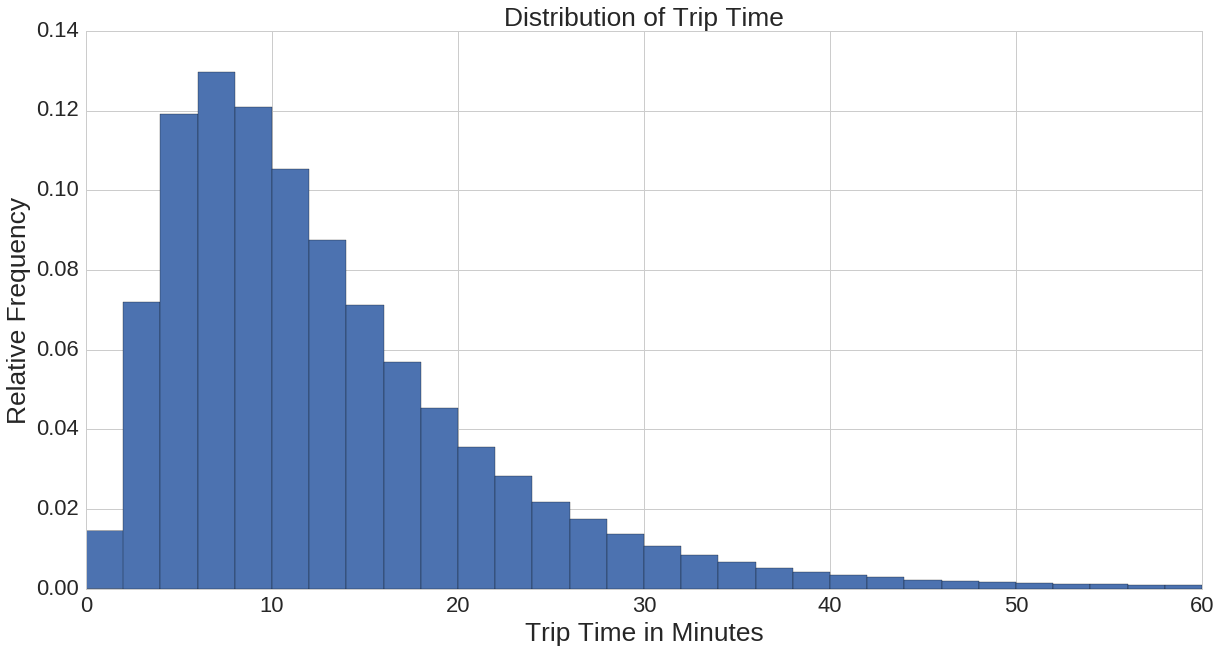

In [20]:
trip_times_in_minutes = data['trip_time'] / np.timedelta64(1, 'm')
plt.hist(trip_times_in_minutes , bins=30, range=[0, 60], 
         weights=np.zeros_like(trip_times_in_minutes) + 1. / trip_times_in_minutes.size)
#plt.yscale('log')
print(trip_times_in_minutes.quantile(q=[0.025, 0.5, 0.75, 0.95, 0.975, 0.99]))
plt.xlabel('Trip Time in Minutes')
plt.ylabel('Relative Frequency')
plt.title('Distribution of Trip Time')
plt.savefig('figures/trip_time_distribution.eps', format='eps', dpi=1000)

In [21]:
len(data.trip_time.value_counts().values)

5840

That many unique values do we have in trip_time.

Identify the the cases without geo data and remove them from our data to be processed.

In [22]:
anomaly = data.loc[(data['dropoff_longitude'].isnull()) | (data['dropoff_latitude'].isnull()) | 
                       (data['pickup_longitude'].isnull()) | (data['pickup_latitude'].isnull())]
data = data.drop(anomaly.index)

In [23]:
anomaly['flag'] = 'geo_NA'

In [24]:
data.isnull().sum()

pickup_datetime            0
dropoff_datetime           0
passenger_count           12
trip_distance          32873
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
fare_amount                0
tip_amount           1656902
total_amount               0
trip_time               3864
dtype: int64

So how many percent of data are left to be processed?

In [25]:
len(data)/(len(data)+len(anomaly))

0.981279805082962

In [26]:
anomaly.tail()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount,trip_time,flag
3534421,2013-05-12 23:58:56,2013-05-13 00:05:43,1.0,2.0,NaN,NaN,NaN,NaN,8.0,1.8,10.8,00:06:47,geo_NA
3534518,2013-05-12 23:59:02,2013-05-13 00:16:03,3.0,6.1,NaN,NaN,NaN,NaN,15.0,NaN,16.0,00:17:01,geo_NA
3534615,2013-05-12 23:59:52,2013-05-13 00:23:15,1.0,5.4,NaN,NaN,NaN,NaN,20.5,NaN,21.5,00:23:23,geo_NA
3534618,2013-05-12 23:59:54,2013-05-13 00:07:45,1.0,1.8,NaN,NaN,NaN,NaN,8.0,NaN,9.0,00:07:51,geo_NA
3534623,2013-05-12 23:59:56,2013-05-13 00:14:28,1.0,7.6,NaN,NaN,NaN,NaN,23.0,NaN,24.0,00:14:32,geo_NA


## <font color = 'black'> So we only dropped 2% of the data because of missing geo tags. Someone could search the 'anomaly'-data for patterns, e.g. for fraud detection. We are also going to drop all the unrecognized trip_distances because we cannot (exactly) generate them (an approximation would be possible). </font color>

In [27]:
anomaly = anomaly.append(data.loc[(data['trip_distance'].isnull())])
anomaly.loc[data.loc[(data['trip_distance'].isnull())].index,'flag'] = 'trip_dist_NA'
anomaly.tail()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,flag,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,total_amount,trip_distance,trip_time
3534334,2013-05-13 00:03:12,40.749736,-73.978713,5.5,trip_dist_NA,1.0,2013-05-12 23:58:16,40.754459,-73.964803,NaN,6.5,NaN,00:04:56
3534517,2013-05-13 00:13:53,40.690212,-73.978735,14.0,trip_dist_NA,1.0,2013-05-12 23:59:01,40.733297,-73.987381,NaN,15.0,NaN,00:14:52
3534607,2013-05-13 00:05:02,40.744680,-73.999020,6.0,trip_dist_NA,1.0,2013-05-12 23:59:50,40.733435,-74.002994,NaN,7.0,NaN,00:05:12
3534612,2013-05-13 00:09:30,40.706187,-74.013075,9.5,trip_dist_NA,1.0,2013-05-12 23:59:52,40.729327,-73.992207,NaN,10.5,NaN,00:09:38
3534626,2013-05-13 00:00:28,40.757354,-73.967262,58.0,trip_dist_NA,1.0,2013-05-12 23:59:58,40.757354,-73.967262,11.6,69.6,NaN,00:00:30


In [28]:
data = data.drop(anomaly.index, errors='ignore') # ignore uncontained labels

In [29]:
data.isnull().sum()

pickup_datetime            0
dropoff_datetime           0
passenger_count            9
trip_distance              0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
fare_amount                0
tip_amount           1638285
total_amount               0
trip_time               2922
dtype: int64

In [30]:
1-len(data)/(len(data)+len(anomaly))

0.028020455877726502

## Drop all the columns with trip_time.isnull() 

In [31]:
anomaly = anomaly.append(data.loc[(data['trip_time'].isnull())])
anomaly.loc[data.loc[(data['trip_time'].isnull())].index,'flag'] = 'trip_time_NA'
anomaly.tail()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,flag,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,total_amount,trip_distance,trip_time
3525186,2013-05-12 23:22:39,40.763210,-73.962524,7.0,trip_time_NA,1.0,2013-05-12 23:22:39,40.759930,-73.975325,NaN,8.0,1.30,NaT
3529613,2013-05-12 23:38:46,40.734109,-73.983598,5.0,trip_time_NA,1.0,2013-05-12 23:38:46,40.742107,-73.974624,1.2,7.2,1.00,NaT
3530873,2013-05-12 23:43:59,40.643328,-73.950397,34.0,trip_time_NA,1.0,2013-05-12 23:43:59,40.727880,-74.001728,NaN,35.0,9.90,NaT
3531118,2013-05-12 23:45:00,40.755222,-73.928660,3.0,trip_time_NA,1.0,2013-05-12 23:45:00,40.753865,-73.929723,NaN,4.0,0.15,NaT
3531331,2013-05-12 23:45:56,40.773872,-73.948701,5.5,trip_time_NA,1.0,2013-05-12 23:45:56,40.766625,-73.962938,NaN,6.5,1.20,NaT


In [32]:
data = data.drop(anomaly.index, errors='ignore') # ignore uncontained labels

# This is quite unreasonable. We have dropoff_datetime = pickup_datetime and the geo-coords of pickup and dropoff do not match! trip_time equals NaT here.

In [33]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
passenger_count,3.43266e+06,1.71448,1.38599,1,1,1,2,6
trip_distance,3.43267e+06,2.91113,3.34836,0.01,1.09,1.8,3.21,100
pickup_longitude,3.43267e+06,-73.9154,2.68755,-736.5,-73.9925,-73.9821,-73.968,40.8679
pickup_latitude,3.43267e+06,40.6919,2.91217,-74.0378,40.7365,40.7534,40.7679,2047.45
dropoff_longitude,3.43267e+06,-73.913,2.98107,-740.173,-73.9918,-73.9806,-73.9651,2387
dropoff_latitude,3.43267e+06,40.6899,3.43265,-3084.28,40.7353,40.7538,40.7686,473.982
fare_amount,3.43267e+06,12.4022,9.71666,2.5,6.5,9.5,14.5,382.75
tip_amount,1.79648e+06,2.59194,2.29176,0.01,1.3,2,3,155.5
total_amount,3.43267e+06,14.834,11.7278,2.5,8,11.3,16.7,382.76
trip_time,3432668,0 days 00:13:02.243506,0 days 00:27:26.535018,0 days 00:00:01,0 days 00:06:24,0 days 00:10:34,0 days 00:16:50,11 days 00:45:28


## After filtering regarding the trip_time

(array([  4.14860000e+04,   2.47244000e+05,   4.11413000e+05,
          4.47479000e+05,   4.18108000e+05,   3.64416000e+05,
          3.02291000e+05,   2.45960000e+05,   1.96811000e+05,
          1.57134000e+05,   1.23172000e+05,   9.75690000e+04,
          7.55190000e+04,   5.99140000e+04,   4.69780000e+04,
          3.66970000e+04,   2.90370000e+04,   2.32160000e+04,
          1.81990000e+04,   1.47690000e+04,   1.18490000e+04,
          9.75400000e+03,   7.90100000e+03,   6.83100000e+03,
          5.64600000e+03,   4.78400000e+03,   4.11200000e+03,
          3.75100000e+03,   3.13700000e+03,   2.76200000e+03,
          2.28500000e+03,   1.89500000e+03,   1.59500000e+03,
          1.43000000e+03,   1.15200000e+03,   1.03000000e+03,
          8.11000000e+02,   7.01000000e+02,   5.63000000e+02,
          4.33000000e+02,   3.88000000e+02,   3.50000000e+02,
          2.88000000e+02,   2.23000000e+02,   2.36000000e+02,
          1.84000000e+02,   1.59000000e+02,   1.33000000e+02,
        

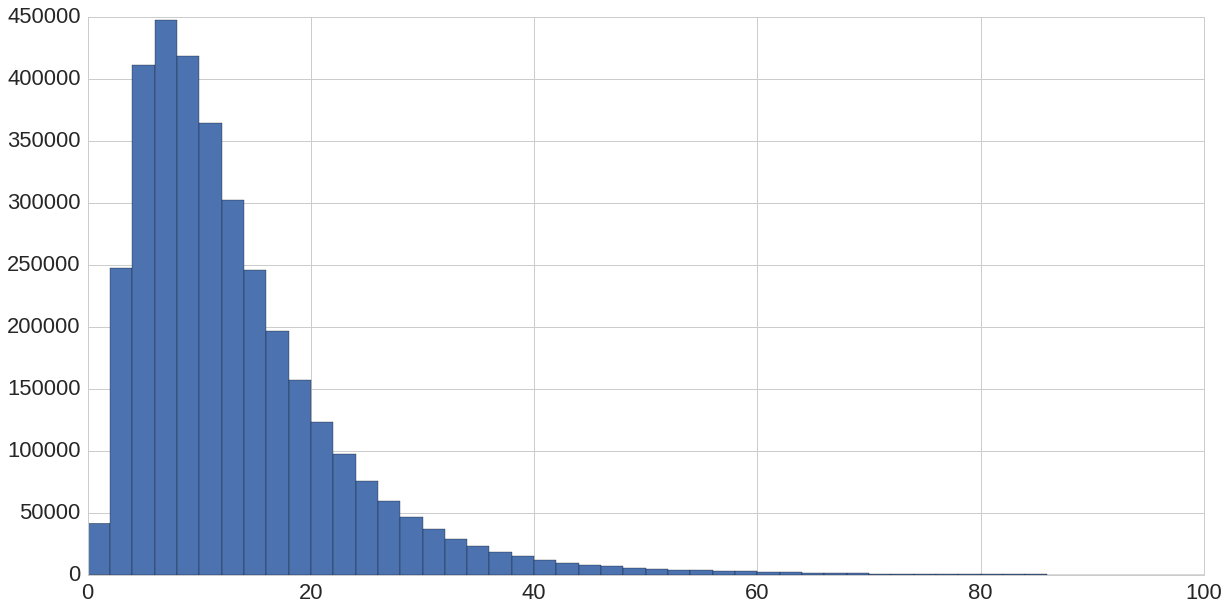

In [34]:
plt.hist(data.trip_time.values / np.timedelta64(1, 'm'), bins=50, range=[0,100])

In [35]:
print(data.trip_time.describe())
np.percentile(data.trip_time, [1,5,10,15,25,50,75,85,95,99]) / np.timedelta64(1,'m')

count                   3432668
mean     0 days 00:13:02.243506
std      0 days 00:27:26.535018
min             0 days 00:00:01
25%             0 days 00:06:24
50%             0 days 00:10:34
75%             0 days 00:16:50
max            11 days 00:45:28
Name: trip_time, dtype: object


array([  1.7945    ,   3.        ,   4.        ,   5.        ,
         6.4       ,  10.56666667,  16.83333333,  21.        ,
        31.        ,  49.08883333])

## We sometimes have some unreasonably small trip_times.

In [36]:
anomaly.tail()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,flag,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,total_amount,trip_distance,trip_time
3525186,2013-05-12 23:22:39,40.763210,-73.962524,7.0,trip_time_NA,1.0,2013-05-12 23:22:39,40.759930,-73.975325,NaN,8.0,1.30,NaT
3529613,2013-05-12 23:38:46,40.734109,-73.983598,5.0,trip_time_NA,1.0,2013-05-12 23:38:46,40.742107,-73.974624,1.2,7.2,1.00,NaT
3530873,2013-05-12 23:43:59,40.643328,-73.950397,34.0,trip_time_NA,1.0,2013-05-12 23:43:59,40.727880,-74.001728,NaN,35.0,9.90,NaT
3531118,2013-05-12 23:45:00,40.755222,-73.928660,3.0,trip_time_NA,1.0,2013-05-12 23:45:00,40.753865,-73.929723,NaN,4.0,0.15,NaT
3531331,2013-05-12 23:45:56,40.773872,-73.948701,5.5,trip_time_NA,1.0,2013-05-12 23:45:56,40.766625,-73.962938,NaN,6.5,1.20,NaT


In [37]:
1-len(data)/(len(data)+len(anomaly))

0.028847133166903904

## <font color = 'blue'> So all in all, we dropped less than 3% of the data. </font color>

In [38]:
data.isnull().sum()

pickup_datetime            0
dropoff_datetime           0
passenger_count            9
trip_distance              0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
fare_amount                0
tip_amount           1636185
total_amount               0
trip_time                  0
dtype: int64

## We can deal with that. External investigation of the anomaly is recommended.

# Start validating the non-anomaly data: Valid trip_time, valid distance?

Correct the avg amount for the initial charge. 

In [39]:
data['avg_amount_per_minute'] = (data.fare_amount-2.5) / (data.trip_time / np.timedelta64(1,'m'))

In [40]:
data.avg_amount_per_minute.describe()

count    3.432668e+06
mean     7.865239e-01
std      6.410160e+00
min      0.000000e+00
25%      5.769231e-01
50%      6.629834e-01
75%      7.857143e-01
max      6.450000e+03
Name: avg_amount_per_minute, dtype: float64

Distribution of the avg_amount_per_minute

Min:0.0
Max:6450.0


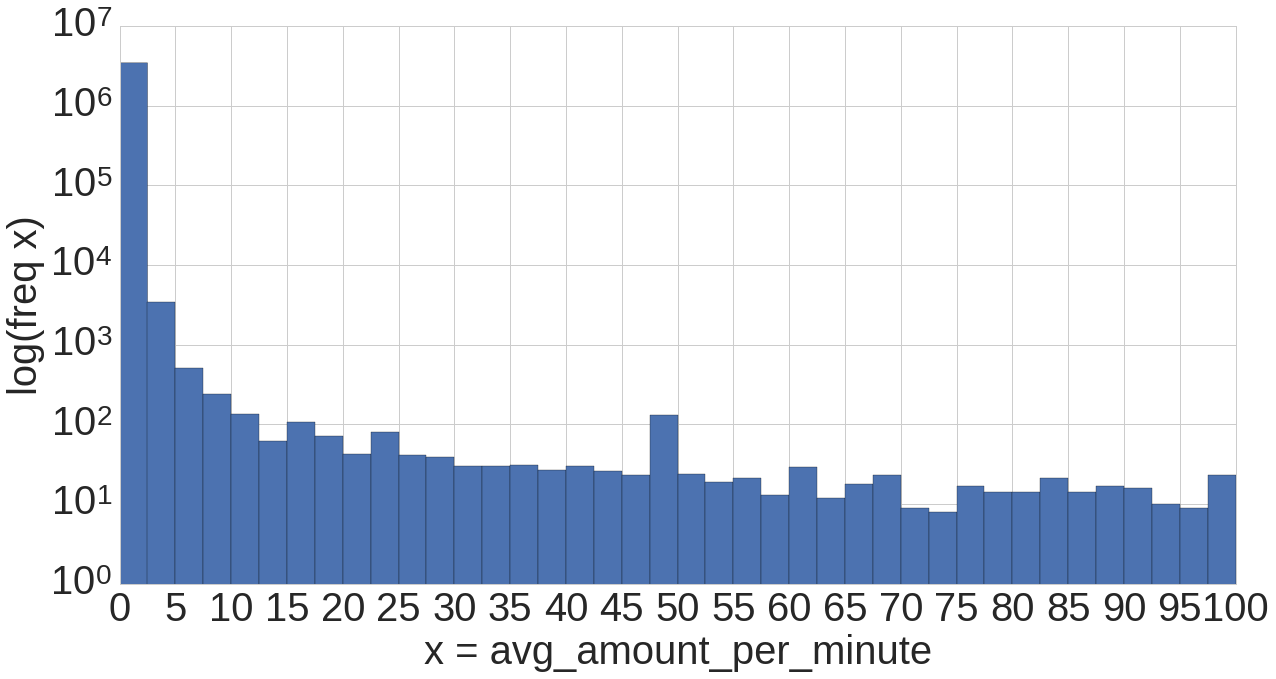

In [41]:
h = data.avg_amount_per_minute
plt.figure(figsize=(20,10))
plt.hist(h, normed=False, stacked=True, bins=40, range=[0 , 100], )
    #, histtype='stepfilled')
plt.yscale('log')
plt.ylabel('log(freq x)', fontsize=40)
plt.xlabel('x = avg_amount_per_minute', fontsize=40)
print('Min:' +  str(min(h)) + '\nMax:' +  str(max(h)))
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.locator_params(axis = 'x', nbins = 20)
plt.show()

In [42]:
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount,trip_time,avg_amount_per_minute
0,2013-05-06,2013-05-06 00:10:00,1.0,2.65,-73.981070,40.766047,-73.981362,40.738092,10.5,2.20,13.70,00:10:00,0.800000
1,2013-05-06,2013-05-06 00:06:00,5.0,1.86,-73.986312,40.760487,-74.005082,40.743372,7.5,NaN,8.50,00:06:00,0.833333
2,2013-05-06,2013-05-06 00:04:00,1.0,0.90,-73.989388,40.731577,-73.986102,40.740732,5.5,NaN,6.50,00:04:00,0.750000
3,2013-05-06,2013-05-06 00:08:00,1.0,2.59,-73.994590,40.751857,-73.963470,40.765912,9.5,NaN,10.50,00:08:00,0.875000
4,2013-05-06,2013-05-06 00:29:00,1.0,18.26,-73.783327,40.648510,-73.974808,40.624810,51.5,6.75,59.25,00:29:00,1.689655


In [43]:
data.avg_amount_per_minute.quantile([.0001,.01, .5, .75, .95, .975, .99, .995])

0.0001    0.000000
0.0100    0.437318
0.5000    0.662983
0.7500    0.785714
0.9500    1.151163
0.9750    1.344677
0.9900    1.605263
0.9950    1.847222
Name: avg_amount_per_minute, dtype: float64

# Compare to http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml . We have a strict lower bound with .5 \$ per minute (taxi waiting in congestion). 2.5 \$ per minute match roughly 1 miles / minute (no static fares included!). So the taxi would drive 60 mp/h.  We take this as an upper bound.

In [44]:
lb = 0.5 
ub = 2.5
anomaly = anomaly.append(data.loc[(data['avg_amount_per_minute'] > ub) | 
                                  (data['avg_amount_per_minute'] < lb)])

anomaly.loc[data.loc[(data['avg_amount_per_minute'] > ub)].index,'flag'] = 'too fast'
anomaly.loc[data.loc[(data['avg_amount_per_minute'] < lb)].index,'flag'] = 'too slow'
data = data.drop(anomaly.index, errors='ignore') # ignore uncontained labels / indices
print(1-len(data)/(len(data)+len(anomaly)))

0.06037092404527544


So we dropped around 6% of the data.

In [45]:
data.avg_amount_per_minute.describe()

count    3.321243e+06
mean     7.244103e-01
std      2.173654e-01
min      5.000000e-01
25%      5.833333e-01
50%      6.666667e-01
75%      7.916667e-01
max      2.500000e+00
Name: avg_amount_per_minute, dtype: float64

In [46]:
anomaly.tail()

,avg_amount_per_minute,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,flag,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,tip_amount,total_amount,trip_distance,trip_time
3534347,3.571429,2013-05-13 00:17:15,40.721621,-74.033262,70.0,too fast,1.0,2013-05-12 23:58:21,40.725023,-74.007006,2.00,80.25,3.40,00:18:54
3534376,297.000000,2013-05-12 23:58:46,40.761277,-73.993425,52.0,too fast,1.0,2013-05-12 23:58:36,40.761278,-73.993303,11.55,69.38,0.90,00:00:10
3534378,0.410959,2013-05-13 00:07:08,40.724592,-73.981777,6.0,too slow,1.0,2013-05-12 23:58:37,40.735385,-73.991185,1.40,8.40,1.10,00:08:31
3534514,2.605263,2013-05-13 00:18:00,40.792230,-73.946103,52.0,too fast,1.0,2013-05-12 23:59:00,40.666372,-73.793397,10.40,68.23,16.11,00:19:00
3534548,9.110429,2013-05-13 00:04:42,40.755859,-73.972549,52.0,too fast,1.0,2013-05-12 23:59:16,40.740766,-73.944841,11.56,69.39,2.50,00:05:26


# Only look at trips in a given bounding box


In [47]:
jfk_geodata = (40.641547, -73.778118)
ridgefield_geodata = (40.856406, -74.020642)
data_in_box = data.loc[(data['dropoff_latitude'] > jfk_geodata[0]) & 
                       (data['dropoff_longitude'] < jfk_geodata[1]) &
                       (data['dropoff_latitude'] < ridgefield_geodata[0]) & 
                       (data['dropoff_longitude'] > ridgefield_geodata[1]) & 
                       (data['pickup_latitude'] > jfk_geodata[0]) & 
                       (data['pickup_longitude'] < jfk_geodata[1]) &
                       (data['pickup_latitude'] < ridgefield_geodata[0]) & 
                       (data['pickup_longitude'] > ridgefield_geodata[1])         
                       ]
# taxidata = taxidata.drop(anomaly.index)

<font color = 'red'> Be careful! They use negative (lat, long), not East/West! </font color>

In [48]:
data_in_box.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount,trip_time,avg_amount_per_minute
0,2013-05-06,2013-05-06 00:10:00,1.0,2.65,-73.981070,40.766047,-73.981362,40.738092,10.5,2.2,13.7,00:10:00,0.800000
1,2013-05-06,2013-05-06 00:06:00,5.0,1.86,-73.986312,40.760487,-74.005082,40.743372,7.5,NaN,8.5,00:06:00,0.833333
2,2013-05-06,2013-05-06 00:04:00,1.0,0.90,-73.989388,40.731577,-73.986102,40.740732,5.5,NaN,6.5,00:04:00,0.750000
3,2013-05-06,2013-05-06 00:08:00,1.0,2.59,-73.994590,40.751857,-73.963470,40.765912,9.5,NaN,10.5,00:08:00,0.875000
5,2013-05-06,2013-05-06 00:14:00,3.0,4.86,-73.965532,40.717052,-73.972442,40.743247,16.5,NaN,17.5,00:14:00,1.000000


In [49]:
print(jfk_geodata < ridgefield_geodata,
len(data_in_box)/len(data))

True 0.9834670332763968


So we've omitted about 2% of the data because the trips do not start and end in the box

## Inspect Manhattan only.

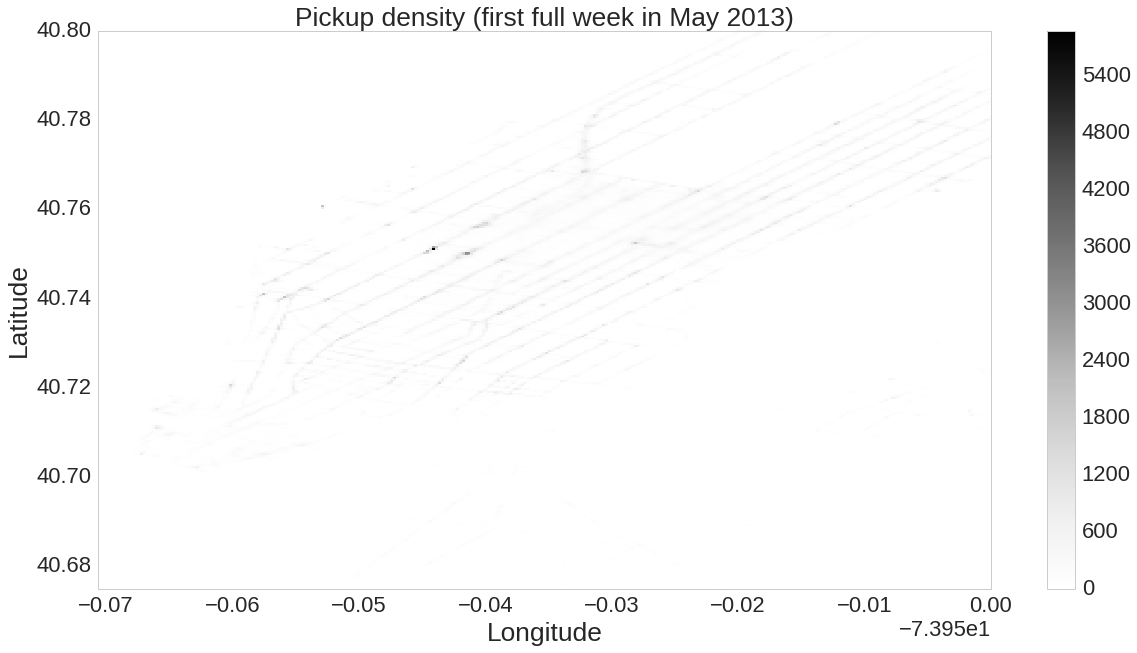

In [50]:
x = data_in_box.pickup_longitude
y = data_in_box.pickup_latitude

plt.jet
H, xedges, yedges = np.histogram2d(x, y, bins=300)#, normed=False, weights=None)

fig = plt.figure(figsize=(20, 10))
plt.hist2d(x, y, bins=300, range=[[min(x.values),-73.95],[40.675,40.8]])
plt.colorbar()
plt.title('Pickup density (first full week in May 2013)')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

ax = fig.gca()
ax.grid(False)
plt.savefig('figures/pickup_density_manhattan_13.png', format='png', dpi=150)

## Again, let's take a look at the distribution of the target variable we want to estimate:

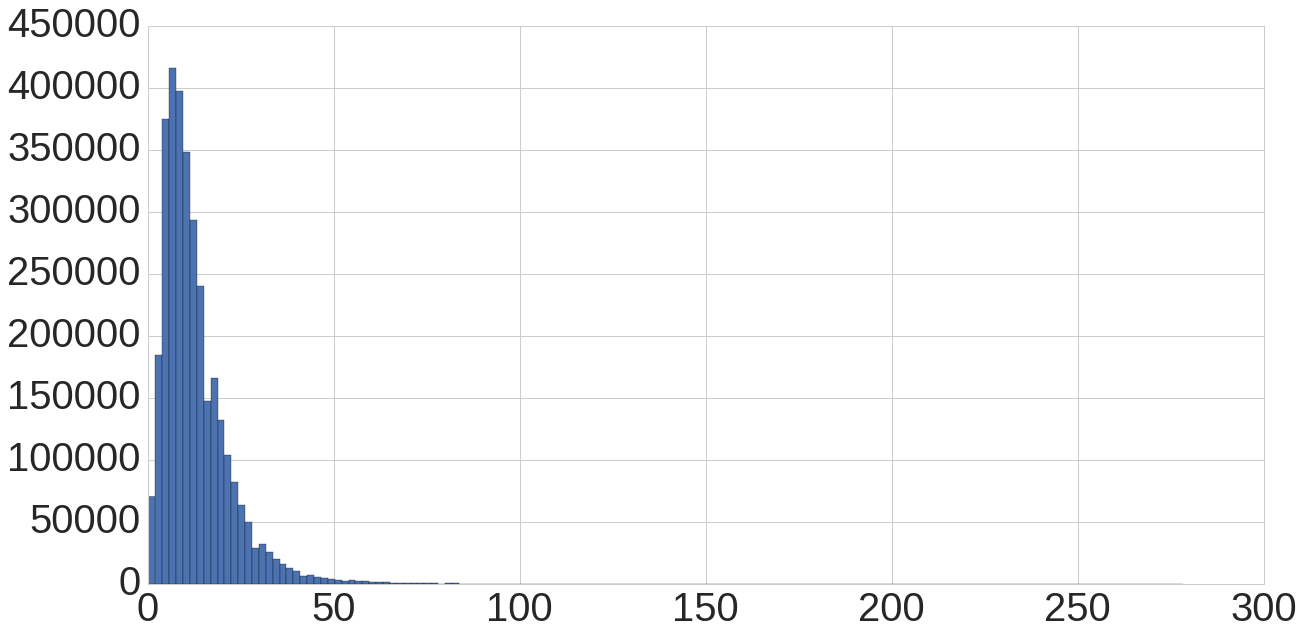

In [51]:
h = data_in_box.trip_time.values / np.timedelta64(1, 'm')
plt.figure(figsize=(20,10))
plt.hist(h, normed=False,  bins=150)
    #, histtype='stepfilled')
#plt.yscale('log')
#plt.ylabel('log(freq x)', fontsize=40)
#plt.xlabel('x = avg_amount_per_minute', fontsize=40)
#print('Min:' +  str(min(h)) + '\nMax:' +  str(max(h)))
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
#plt.locator_params(axis = 'x', nbins = 20)
plt.show()

In [52]:
data_in_box.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount,total_amount,trip_time,avg_amount_per_minute
0,2013-05-06,2013-05-06 00:10:00,1.0,2.65,-73.981070,40.766047,-73.981362,40.738092,10.5,2.2,13.7,00:10:00,0.800000
1,2013-05-06,2013-05-06 00:06:00,5.0,1.86,-73.986312,40.760487,-74.005082,40.743372,7.5,NaN,8.5,00:06:00,0.833333
2,2013-05-06,2013-05-06 00:04:00,1.0,0.90,-73.989388,40.731577,-73.986102,40.740732,5.5,NaN,6.5,00:04:00,0.750000
3,2013-05-06,2013-05-06 00:08:00,1.0,2.59,-73.994590,40.751857,-73.963470,40.765912,9.5,NaN,10.5,00:08:00,0.875000
5,2013-05-06,2013-05-06 00:14:00,3.0,4.86,-73.965532,40.717052,-73.972442,40.743247,16.5,NaN,17.5,00:14:00,1.000000


# <font color = 'red'> Make a new dataframe with features and targets to train the model </font>

In [53]:
time_regression_df = pd.DataFrame([#data_in_box['pickup_datetime'].dt.day,
                          data_in_box['pickup_datetime'].dt.dayofweek,
                          data_in_box['pickup_datetime'].dt.hour,
                          data_in_box['pickup_latitude'],
                          data_in_box['pickup_longitude'],
                          data_in_box['dropoff_latitude'],
                          data_in_box['dropoff_longitude'],
                          np.ceil(data_in_box['trip_time']/np.timedelta64(1, 'm')),
                         ]).T

In [54]:
time_regression_df.columns = ['pickup_datetime_dayofweek', 'pickup_datetime_hour',
                              'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
                              'trip_time']

Use minutes for prediction instead of seconds (ceil the time). Definitley more robust than seconds!

In [55]:
time_regression_df.tail()

,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_time
3534627,6.0,23.0,40.744021,-73.999512,40.825470,-73.953479,15.0
3534628,6.0,23.0,40.741475,-73.981322,40.751637,-73.975838,3.0
3534629,6.0,23.0,40.770077,-73.863887,40.644504,-73.963537,22.0
3534630,6.0,23.0,40.736240,-73.990593,40.744194,-73.985401,5.0
3534631,6.0,23.0,40.772929,-73.949516,40.728967,-73.988787,15.0


In [56]:
time_regression_df.head()

,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_time
0,0.0,0.0,40.766047,-73.981070,40.738092,-73.981362,10.0
1,0.0,0.0,40.760487,-73.986312,40.743372,-74.005082,6.0
2,0.0,0.0,40.731577,-73.989388,40.740732,-73.986102,4.0
3,0.0,0.0,40.751857,-73.994590,40.765912,-73.963470,8.0
5,0.0,0.0,40.717052,-73.965532,40.743247,-73.972442,14.0


In [57]:
time_regression_df.ix[:,0:6].describe()

,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,3.266333e+06,3.266333e+06,3.266333e+06,3.266333e+06,3.266333e+06,3.266333e+06
mean,3.039328e+00,1.350386e+01,4.075136e+01,-7.397645e+01,4.075162e+01,-7.397513e+01
std,1.961083e+00,6.552920e+00,2.582007e-02,3.135320e-02,2.840570e-02,3.012289e-02
min,0.000000e+00,0.000000e+00,4.064155e+01,-7.402063e+01,4.064155e+01,-7.402057e+01
25%,1.000000e+00,9.000000e+00,4.073668e+01,-7.399259e+01,4.073577e+01,-7.399176e+01
50%,3.000000e+00,1.400000e+01,4.075343e+01,-7.398216e+01,4.075387e+01,-7.398066e+01
75%,5.000000e+00,1.900000e+01,4.076813e+01,-7.396825e+01,4.076884e+01,-7.396539e+01
max,6.000000e+00,2.300000e+01,4.085636e+01,-7.377812e+01,4.085640e+01,-7.377812e+01


In [58]:
print(time_regression_df.trip_time.value_counts())
print(len(time_regression_df.trip_time.value_counts()))

7.0      216659
6.0      212922
8.0      212253
9.0      203203
5.0      198847
10.0     190577
11.0     176963
4.0      167658
12.0     161870
13.0     146481
14.0     132243
15.0     118781
3.0      115848
16.0     106682
17.0      94945
18.0      84644
19.0      75749
20.0      67035
21.0      58914
2.0       55534
22.0      52250
23.0      46464
24.0      40736
25.0      35394
26.0      31199
27.0      27649
28.0      24524
29.0      21292
30.0      18618
31.0      16680
          ...  
120.0         3
123.0         2
143.0         2
145.0         2
128.0         2
138.0         2
121.0         2
119.0         2
118.0         2
157.0         1
156.0         1
154.0         1
153.0         1
148.0         1
160.0         1
164.0         1
137.0         1
178.0         1
136.0         1
134.0         1
133.0         1
132.0         1
131.0         1
130.0         1
129.0         1
125.0         1
124.0         1
117.0         1
115.0         1
279.0         1
Name: trip_time, dtype: 

## So we hace 148 different times to predict.

In [59]:
time_regression_df.trip_time.quantile([0.05, 0.95])

0.05     3.0
0.95    30.0
Name: trip_time, dtype: float64

So 90% of the trip_times are between 3 and 30 minutes.

## A few stats about the avg. pickups per hour

In [60]:
hour_stats = time_regression_df.groupby(time_regression_df.pickup_datetime_hour)

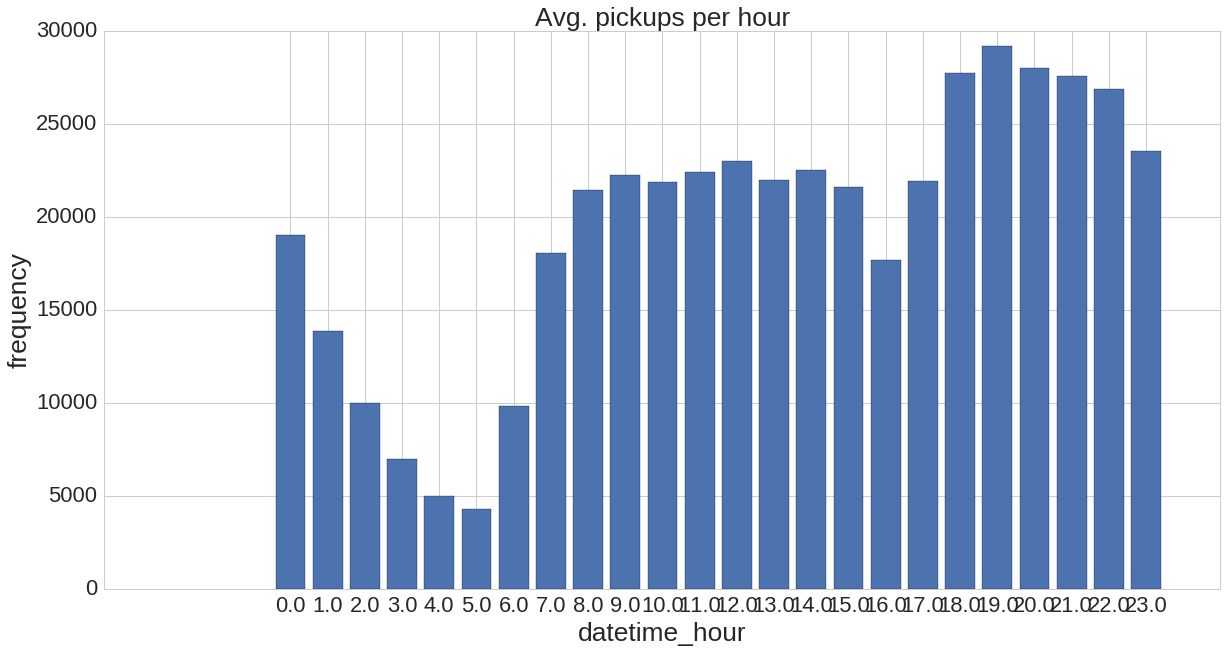

In [61]:
plt.bar(left = hour_stats.pickup_datetime_hour.count().keys(), height=hour_stats.pickup_datetime_hour.count().values/7, 
       tick_label=hour_stats.pickup_datetime_hour.count().keys(), align='center')
plt.title('Avg. pickups per hour')
plt.xlabel('datetime_hour')
plt.ylabel('frequency')
plt.savefig('avg_pickups_per_hour.png')

In [62]:
print('Avg. pickups per half-hour (summarized over 1 week)')
hour_stats.pickup_datetime_hour.count()/14

Avg. pickups per half-hour (summarized over 1 week)


pickup_datetime_hour
0.0      9498.000000
1.0      6936.000000
2.0      4986.357143
3.0      3496.357143
4.0      2482.285714
5.0      2151.500000
6.0      4909.357143
7.0      9031.214286
8.0     10726.285714
9.0     11130.571429
10.0    10944.857143
11.0    11205.857143
12.0    11487.642857
13.0    10997.642857
14.0    11269.785714
15.0    10798.785714
16.0     8841.285714
17.0    10963.857143
18.0    13860.857143
19.0    14584.714286
20.0    14010.142857
21.0    13788.142857
22.0    13446.642857
23.0    11761.357143
Name: pickup_datetime_hour, dtype: float64

In [63]:
(hour_stats.count()/14).quantile([.5])

,pickup_datetime_dayofweek,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_time
0.5,10954.357143,10954.357143,10954.357143,10954.357143,10954.357143,10954.357143


# Split the data into a training dataset and a test dataset. Evaluate the performance of the decision tree on the test data

In [64]:
time_regression_df.columns

Index(['pickup_datetime_dayofweek', 'pickup_datetime_hour', 'pickup_latitude',
       'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
       'trip_time'],
      dtype='object')

In [65]:
from sklearn import cross_validation as cv
time_regression_df_train, time_regression_df_test = cv.train_test_split(time_regression_df, test_size=0.1, random_state=99)
y_train = time_regression_df_train['trip_time']
x_train = time_regression_df_train.ix[:, 0:6]
y_test = time_regression_df_test['trip_time']
x_test = time_regression_df_test.ix[:, 0:6]

In [66]:
time_regression_df_train.tail()

,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_time
2022607,4.0,1.0,40.669259,-73.986446,40.658110,-73.996890,4.0
912919,1.0,22.0,40.784262,-73.977685,40.852637,-73.932985,17.0
3090961,6.0,0.0,40.728087,-73.988042,40.690582,-73.966325,17.0
1400751,2.0,21.0,40.769983,-73.863293,40.815013,-73.944113,15.0
1889034,3.0,20.0,40.760670,-73.969077,40.716767,-74.004000,17.0


In [67]:
len(x_train)

2939699

In [68]:
xy_test = pd.concat([x_test, y_test], axis=1)

In [69]:
xy_test.head()

,pickup_datetime_dayofweek,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_time
3122858,6.0,1.0,40.778213,-73.952551,40.799014,-73.968229,8.0
1967458,3.0,23.0,40.759134,-73.995934,40.717645,-74.015911,12.0
427989,0.0,22.0,40.759487,-73.970370,40.712392,-73.826657,21.0
1852088,3.0,19.0,40.716318,-73.955408,40.694955,-73.940483,16.0
1629946,3.0,10.0,40.707655,-74.009205,40.750217,-73.994900,42.0


In [70]:
# xy_test.to_csv('taxi_tree_test_Xy_20130506-12.csv')
# x_test.to_csv('taxi_tree_test_X_20130506-12.csv')
# y_test.to_csv('taxi_tree_test_y_20130506-12.csv')

In [71]:
# xy_test_sample = Xy_test.sample(10000, random_state=99)

In [72]:
# xy_test_sample.to_csv('taxi_tree_test_Xy_sample.csv')

In [73]:
# xy_test_sample.head()

In [74]:
print(x_train.shape)
print(x_train.size)
print(x_test.shape)
print(x_train.shape[0]+x_test.shape[0])

(2939699, 6)
17638194
(326634, 6)
3266333


# Begin model building

In [76]:
import time
# Import the necessary modules and libraries
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

## Train and compare a few decision trees with different parameters

In [91]:
#features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','pickup_datetime']
#print("* features:", features, sep="\n")

max_depth_list = (10,15,20,25,30)
scores = [-1, -1, -1, -1, -1]
sum_abs_devs = [-1, -1, -1, -1, -1]
times = [-1, -1, -1, -1, -1]
for i in range(0,len(max_depth_list)):
    start = time.time()
    regtree = DecisionTreeRegressor(min_samples_split=1000, random_state=10, max_depth=max_depth_list[i])# formerly 15. 15 is reasonable, 
    # 30 brings best results # random states: 99
    regtree.fit(x_train, y_train)
    scores[i]= regtree.score(x_test, y_test)
    y_pred = regtree.predict(x_test)
    sum_abs_devs[i] = sum(abs(y_pred-y_test))
    times[i] = time.time() - start
print(max_depth_list)
print(scores)
print(sum_abs_devs)
print(times)

(10, 15, 20, 25, 30)
[0.51337097515902541, 0.64409382777503155, 0.6957163207523871, 0.71429589738370614, 0.7159815227278703]
[1547595.3414912082, 1284490.8114952976, 1143568.0997977962, 1084873.9820350427, 1077427.5321143884]
[14.676559448242188, 20.211236476898193, 23.846965551376343, 26.270352125167847, 26.993313789367676]


| Summe der abs. Abweichung | max_depth |      |      |      |      |
|---------------------------|-----------|------|------|------|------|
| min_samples_split         | 10        | 15   | 20   | 25   | 30   |
| 3                         | 1543      | 1267 | 1127 | 1088 | 1139 |
| 10                        | 1544      | 1266 | 1117 | 1062 | 1086 |
| 20                        | 1544      | 1265 | 1108 | 1037 | 1034 |
| 50                        | 1544      | 1263 | 1097 | 1011 | 994  |
| 250                       | 1544      | 1266 | 1103 | 1019 | 1001 |
| 1000                      | 1548      | 1284 | 1144 | 1085 | 1077 |
| 2500                      | 1555      | 1307 | 1189 | 1150 | 1146 |

Min_samples_split = 3  
(10, 15, 20, 25, 30)  
[0.51550436937183575, 0.64824394212610637, 0.68105673170887715, 0.66935222696811203, 0.62953726391785103]  
[1543779.4758261547, 1267630.6429649692, 1126951.2647852183, 1088342.055931434, 1139060.7870262777]  
[14.802491903305054, 21.25719118118286, 27.497225046157837, 32.381808280944824, 35.0844943523407]

Min_samples_split = 10  
(10, 15, 20, 25, 30)  
[0.51546967657630205, 0.65055440252664309, 0.69398351369676525, 0.69678113708751077, 0.67518497976746361]  
[1543829.4000325042, 1266104.6486240581, 1117165.9640872395, 1061893.3390857978, 1086045.4846943137]  
[14.141993999481201, 20.831212759017944, 25.626588821411133, 29.81039047241211, 32.23483180999756]

Min_samples_split = 20  
(10, 15, 20, 25, 30)  
[0.51537943698967736, 0.65215078696481421, 0.70216115764491505, 0.71547757670696144, 0.70494598277965781]  
[1543841.1100632891, 1264595.0251062319, 1108064.4596608584, 1036593.8033015681, 1039378.3133869285]  
[14.048030376434326, 20.481205463409424, 25.652794361114502, 29.03341507911682, 31.56394076347351]

min_samples_split=50  
(10, 15, 20, 25, 30)  
[0.51540742268899331, 0.65383862050244068, 0.71125658610588971, 0.73440457163892259, 0.73435595461521908]  
[1543721.3435906437, 1262877.4227863667, 1097080.889761846, 1010511.305738725, 994244.46643680066]  
[14.682952404022217, 21.243955373764038, 25.80405569076538, 28.731933116912842, 32.00149917602539]

min_samples_split=250  
(10, 15, 20, 25, 30)  
[0.51532618474195502, 0.65304694576643452, 0.712453138233199, 0.73862283625684677, 0.74248829470934752]  
[1544004.1103626473, 1266358.9437320188, 1102793.6462709717, 1018555.9754967012, 1000675.2014443219]  
[14.215412378311157, 20.32301664352417, 25.39385199546814, 27.81620717048645, 28.74960231781006]

min_samples_split=1000  
(10, 15, 20, 25, 30)  
[0.51337097515902541, 0.64409382777503155, 0.6957163207523871, 0.71429589738370614, 0.7159815227278703]  
[1547595.3414912082, 1284490.8114952976, 1143568.0997977962, 1084873.9820350427, 1077427.5321143884]  
[14.676559448242188, 20.211236476898193, 23.846965551376343, 26.270352125167847, 26.993313789367676]

min_samples_split=2500  
(10, 15, 20, 25, 30)  
[0.50872112253965895, 0.63184888428446373, 0.67528344919996985, 0.68767132817144228, 0.68837707513473978]  
[1554528.9746030923, 1306995.3609336747, 1188981.9585730932, 1149615.9326777055, 1146209.3017767756]  
[14.31177806854248, 20.02240490913391, 23.825161457061768, 24.616609811782837, 25.06274127960205]

Train the most promising decision tree again

In [144]:
start = time.time()
regtree = DecisionTreeRegressor(min_samples_split=50, random_state=10, max_depth=25, splitter='best' )
regtree.fit(x_train, y_train)
regtree.score(x_test, y_test)
y_pred = regtree.predict(x_test)
sum_abs_devs = sum(abs(y_pred-y_test))
elapsed = time.time() - start
print(elapsed)

29.28906536102295


In [145]:
# from sklearn import tree
# tree.export_graphviz(regtree, out_file='figures/tree_d10.dot', feature_names=time_regression_df.ix[:,0:6].columns, class_names=time_regression_df.columns[6])    

In [146]:
regtree.tree_.impurity

array([  84.65740931,   67.47581069,   54.53424675, ...,   18.58832645,
         76.5443787 ,  109.78512397])

In [147]:
y_train.describe()

count    2.939699e+06
mean     1.303100e+01
std      9.200948e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.100000e+01
75%      1.700000e+01
max      1.780000e+02
Name: trip_time, dtype: float64

In [148]:
print('R²: ', regtree.score(x_test, y_test))

R²:  0.734404571639


In [149]:
from sklearn.externals import joblib
joblib.dump(regtree, 'treelib/regtree_depth_25_mss_50_rs_10.pkl', protocol=2) 

['treelib/regtree_depth_25_mss_50_rs_10.pkl',
 'treelib/regtree_depth_25_mss_50_rs_10.pkl_01.npy',
 'treelib/regtree_depth_25_mss_50_rs_10.pkl_02.npy',
 'treelib/regtree_depth_25_mss_50_rs_10.pkl_03.npy']

A few stats about the trained tree:

In [150]:
print(regtree.feature_importances_ ,'\n',
      regtree.class_weight,'\n',
      regtree.min_samples_leaf,'\n',
      regtree.tree_.n_node_samples,'\n'
      )

[ 0.03798533  0.08706913  0.20192368  0.26153429  0.17102708  0.24046048] 
 None 
 1 
 [2939699 2839702 2767340 ...,      44      13      11] 



# Finding the leaves / predicted times

In [151]:
leaves = regtree.tree_.children_left*regtree.tree_.children_right
for idx, a in enumerate(leaves):
    if a==1:
        x=1# do nothing
    else:
        leaves[idx] = 0
print(leaves)

[0 0 0 ..., 1 1 1]


In [152]:
print(leaves[leaves==1].sum())
len(leaves==1)

67260


134519

In [153]:
(67260+67259)==134519

True

In [154]:
len(leaves[leaves==1])/regtree.tree_.node_count

0.5000037169470484

So 50% of the nodes are leaves.

In [155]:
print((leaves==1).sum()+(leaves==0).sum())
print(len(leaves))

134519
134519


So we have 67260 leaves.

In [156]:
node_samples = regtree.tree_.n_node_samples

In [157]:
leaf_samples = np.multiply(leaves, node_samples)
stats = np.unique(leaf_samples, return_counts=True)
stats

(array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
            9,    10,    11,    12,    13,    14,    15,    16,    17,
           18,    19,    20,    21,    22,    23,    24,    25,    26,
           27,    28,    29,    30,    31,    32,    33,    34,    35,
           36,    37,    38,    39,    40,    41,    42,    43,    44,
           45,    46,    47,    48,    49,    50,    51,    52,    53,
           54,    55,    56,    57,    58,    59,    60,    61,    62,
           63,    64,    65,    66,    67,    68,    69,    70,    71,
           72,    73,    74,    75,    76,    77,    78,    79,    80,
           81,    82,    83,    84,    85,    86,    87,    88,    89,
           90,    91,    92,    93,    94,    95,    96,    97,    98,
           99,   100,   101,   102,   103,   104,   105,   106,   107,
          108,   109,   110,   111,   112,   113,   114,   115,   116,
          117,   118,   119,   120,   121,   122,   123,   124,   125,
      

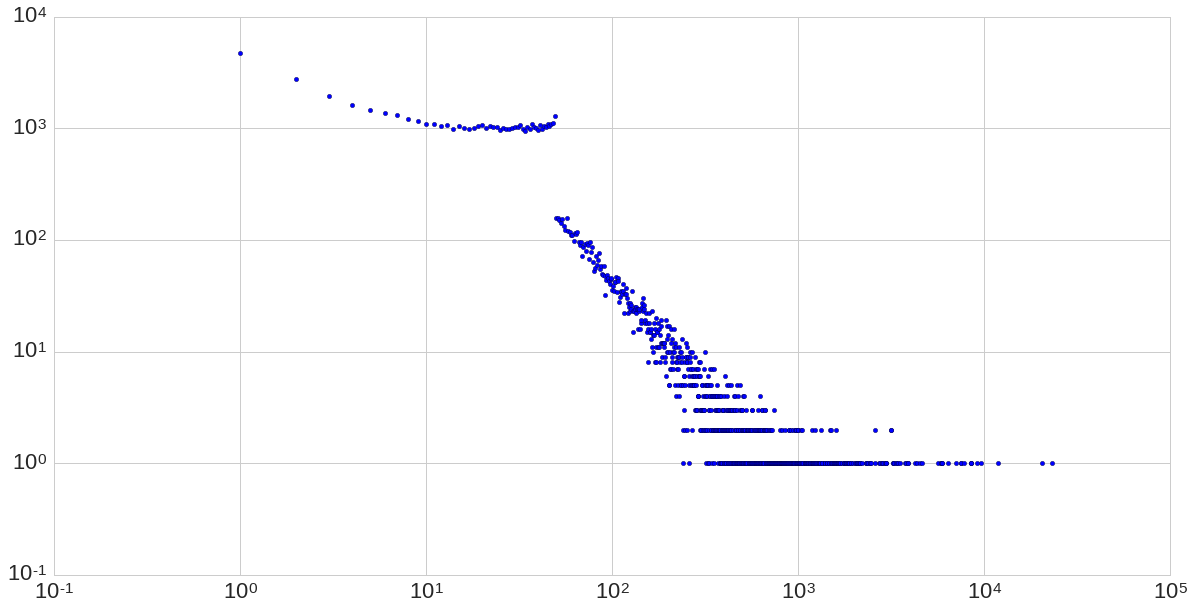

In [158]:
plt.scatter(stats[0][1:], stats[1][1:])
plt.yscale('log')
plt.xscale('log')

# The above plot is not very useful. But the Lorentzcurve is.

## To get a feeling for the generalization of the tree: Do some leaves represent the vast amount of trips? This is what we would expect. 

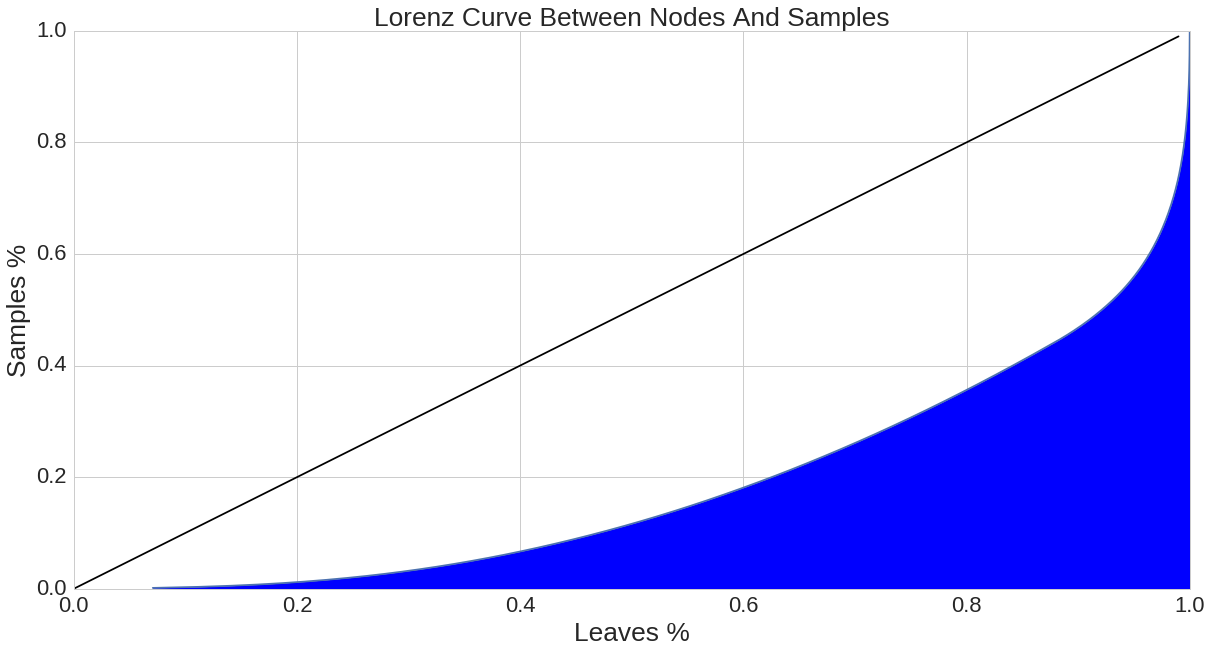

In [159]:
node_perc = np.cumsum(stats[1][1:]) # Cumulative sum of nodes
samples_perc = np.cumsum(np.multiply(stats[0][1:],stats[1][1:]))
node_perc = node_perc / node_perc[-1]
samples_perc = samples_perc / samples_perc[-1]
plt.plot(node_perc, samples_perc)
plt.plot((np.array(range(0,100,1))/100), (np.array(range(0,100,1))/100), color='black')
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('Lorenz Curve Between Nodes And Samples')
plt.xlabel('Leaves %')
plt.ylabel('Samples %')
plt.fill_between(node_perc, samples_perc , color='blue', alpha='1')
plt.savefig('figures/lorenzcurve_d25_msp_50.eps', format='eps', dpi=1000)
plt.savefig('figures/lorenzcurve_d25_msp_50.png', format='png', dpi=300)

Perzentile(%):  [1, 5, 10, 15, 25, 50, 75, 90, 95, 99] 
 [-15.          -7.51219512  -4.86363636  -3.45399089  -1.80952381
   0.44690265   2.35         4.32142857   5.92        11.05128205]
Absolute time deviation (in 1k):  1010.51130574


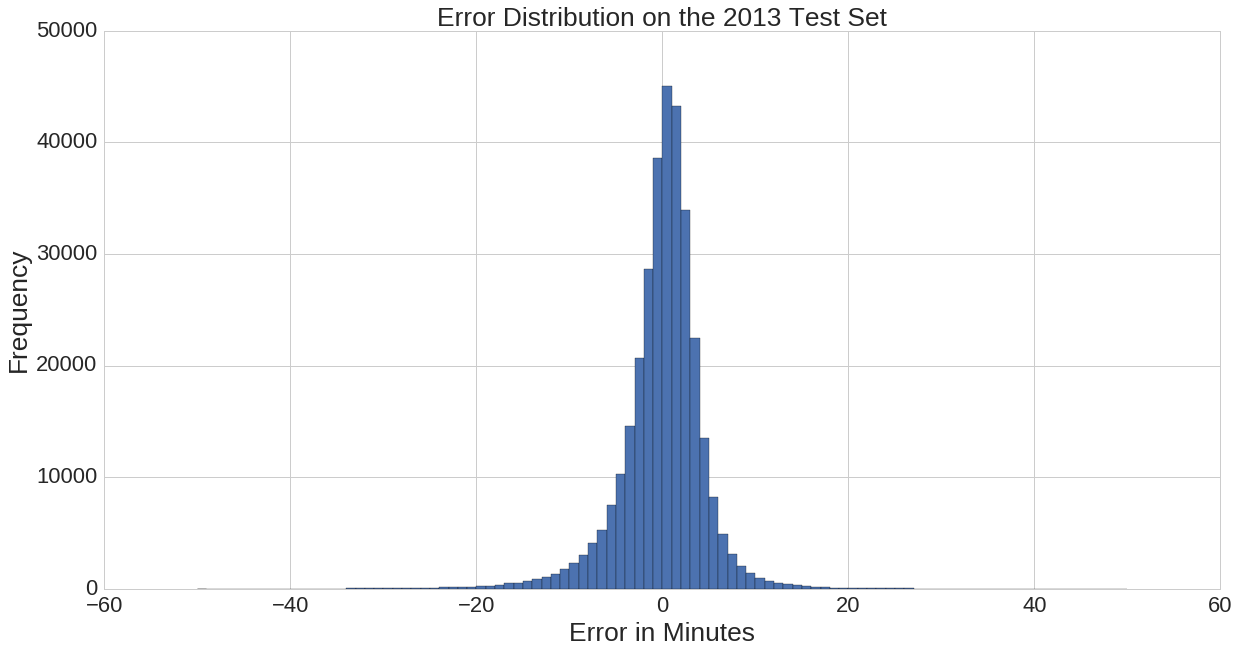

In [160]:
y_pred = regtree.predict(x_test)
np.linalg.norm(np.ceil(y_pred)-y_test)
diff = (y_pred-y_test)
# plt.figure(figsize=(12,10)) # not needed. set values globally
plt.hist(diff.values, bins=100, range=[-50, 50])
print('Perzentile(%): ', [1,5,10,15,25,50,75,90,95,99], '\n', np.percentile(diff.values, [1,5,10,15,25,50,75,90,95,99]))
print('Absolute time deviation (in 1k): ', sum(abs(diff))/1000)
plt.title('Error Distribution on the 2013 Test Set')
plt.xlabel('Error in Minutes')
plt.ylabel('Frequency')
plt.savefig('figures/simple_tree_error_d25_msp_50.eps', format='eps', dpi=1000)

In [161]:
diff.describe()

count    326634.000000
mean          0.002958
std           4.758333
min        -258.090909
25%          -1.809524
50%           0.446903
75%           2.350000
max          82.000000
Name: trip_time, dtype: float64

count    326634.000000  
mean          0.004523  
std           5.214362  
min        -258.000000  
25%          -2.076923  
50%           0.500000  
75%           2.679482   
max         139.000000  
Name: trip_time, dtype: float64

We found out that all samples have been considered.

In [162]:
sum(leaf_samples)==len(x_train)

True

# Get leaf that contains the most samples:

In [126]:
leaf_only_samples = leaf_samples[leaf_samples != 0]
print('Pos: ' , np.argmax(leaf_only_samples),  'No of samples:', max(leaf_only_samples))

Pos:  56458 No of samples: 53884


In [127]:
len(leaf_samples)==regtree.tree_.node_count

True

In [128]:
print(np.argmax(leaf_samples), max(leaf_samples))

112930 53884


# <font color = 'red'> Go on here with refactoring </font>

In [129]:
right = regtree.tree_.children_right
left = regtree.tree_.children_left
for i, j in enumerate(right):
    if j == 112930:
        print(i)

112928


# Retrieve the decision path that leads to leaf 'leaf'

In [113]:
sum(right==112928)

1

NameError: name 'pila_splits' is not defined

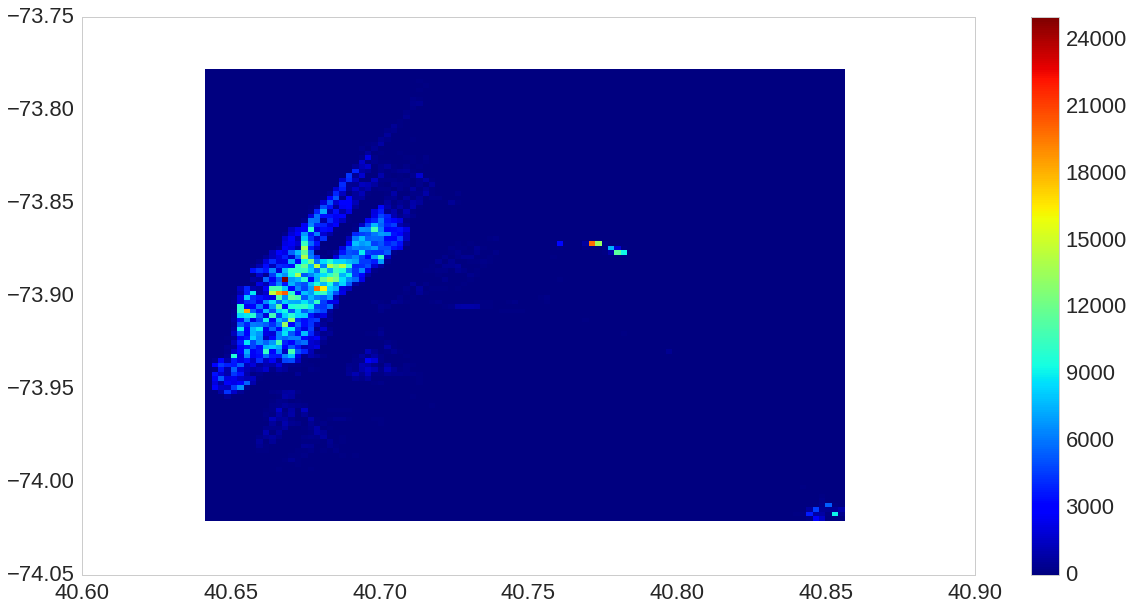

In [114]:
x = data_in_box.pickup_latitude
y = data_in_box.pickup_longitude

H, xedges, yedges = np.histogram2d(x, y, bins=100, normed=False, weights=None)

plt.jet()
fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
mesh = plt.pcolormesh(X, Y, H)
plt.colorbar(mesh)
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')



## Plot the horizontal / vertival lines here via eventplot
plt.hold(True)
plt.axvline(min(pila_splits),linewidth = 4, color = [1,0,0])
plt.axhline(min(pilo_splits), color = [1,0,0])
plt.axvline(min(drola_splits), color = [1,0,1])
plt.axhline(min(drolo_splits), color = [1,0,1])

latmin = min(np.hstack([pila_splits, drola_splits]))
latmax = max(np.hstack([pila_splits, drola_splits]))
lomin = min(np.hstack([pilo_splits, drolo_splits]))
lomax = max(np.hstack([pilo_splits, drolo_splits]))
slb = 0.9999 # scale lower bound
sub = 1.0001#scale upper bound 
plt.axis([slb*latmin,sub*latmax,sub*lomin,slb*lomax])
# plt.axis([xedges.min(),xedges.max(),yedges.min(),yedges.max()]) # zoom in
plt.hold(True)
print('Time splits: ',time_splits.values,
     'Pickup: Red, Dropoff: White')

In [115]:
def get_rule(tree, feature_names, leaf):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value
        samples = tree.tree_.n_node_samples
        global count
        count = 0;
        global result
        result = {};

        def recurse_up(left, right, threshold, features, node):
            global count
            global result
            count = count+1;
            print(count)
            if node != 0:
                for i, j in enumerate(right):
                    if j == node:
                        print( 'Node:', node, ' with ', features[node], '>', threshold[node],'is right of:',i)
                        # draw_line(features[node],threshold[node],False)
                        result[count] = [features[node], False, threshold[node]]
                        return(recurse_up(left, right, threshold, features, i))
                for i, j in enumerate(left):
                    if j == node:
                        print('Node:', node, ' with ', features[node], '<= ', threshold[node], 'is left of',i,)
                        # draw_line(features[node],threshold[node],False)
                        result[count] = [features[node], True, threshold[node]]
                        return(recurse_up(left, right, threshold, features, i))
            else :
                result[count] = [features[node], '?', threshold[node]]
                print('Node:', node, ' with ', features[node], '? ', threshold[node])
                return(result)
        
        print('Leaf:',leaf)
        recurse_up(left, right, threshold, features, leaf)
        return(result)

def draw_line(feature, threshold, isLeft):
    color = [1,1,1]
    linewidth = 2
    vertical = False
    if isLeft:
        color = [1,0,0]
    if 'dropoff' in feature:
        linewidth = 2
    if 'lat' in feature:  
        vertical = True;
    if vertical:
        plt.axvline(threshold,linewidth = linewidth, color = color)
        print('vert')
    else:
        plt.axhline(threshold,linewidth = linewidth, color = color)
        print('hor')

In [116]:
regtree.tree_.threshold

array([-73.88609314, -73.88708496,  40.71197891, ...,  40.84429169,
        -2.        ,  -2.        ])

In [117]:
a=get_rule(regtree, time_regression_df.ix[:,0:6].columns,112930)

Leaf: 112930
1
Node: 112930  with  dropoff_latitude > -2.0 is right of: 112928
2
Node: 112928  with  dropoff_longitude > -74.0030441284 is right of: 112924
3
Node: 112924  with  pickup_longitude <=  -74.0040206909 is left of 112923
4
Node: 112923  with  pickup_latitude <=  40.7473983765 is left of 112922
5
Node: 112922  with  dropoff_latitude <=  40.741607666 is left of 112921
6
Node: 112921  with  dropoff_longitude <=  -73.9636077881 is left of 112920
7
Node: 112920  with  pickup_latitude <=  40.75025177 is left of 112919
8
Node: 112919  with  pickup_latitude <=  40.7558288574 is left of 112918
9
Node: 112918  with  dropoff_latitude <=  40.7464828491 is left of 112917
10
Node: 112917  with  pickup_longitude <=  -73.9626312256 is left of 112916
11
Node: 112916  with  pickup_latitude <=  40.7738380432 is left of 112915
12
Node: 112915  with  dropoff_latitude <=  40.7698669434 is left of 112914
13
Node: 112914  with  pickup_datetime_dayofweek <=  4.5 is left of 112913
14
Node: 112913  wi

vert
hor
hor
vert
vert
hor
vert
vert
vert
hor
vert
vert
hor
hor
vert
hor
hor
vert
vert
hor


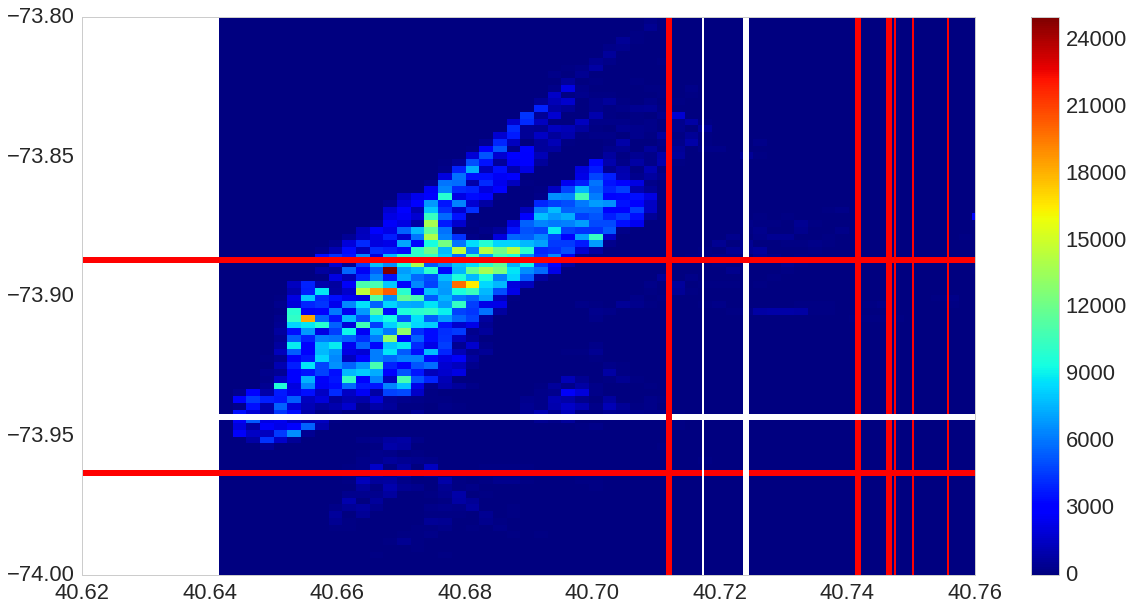

In [118]:
x = data_in_box.pickup_latitude
y = data_in_box.pickup_longitude

H, xedges, yedges = np.histogram2d(x, y, bins=100, normed=False, weights=None)

plt.jet()
global fig
fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
mesh = plt.pcolormesh(X, Y, H)
plt.colorbar(mesh)
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')



## Plot the horizontal / vertival lines here via eventplot
plt.hold(True)
#get_rule(regtree, time_regression_df.ix[:,0:6].columns,112930)
for i in range(1,len(a)):
    feature = a[i][0]
    isLeft = a[i][1]
    threshold = a[i][2]
    color = [1,1,1]
    linewidth = 2
    vertical = False
    if isLeft:
        color = [1,0,0]
    if 'dropoff' in feature:
        linewidth = 6
    if 'lat' in feature:  
        vertical = True;
    if vertical:
        plt.axvline(threshold,linewidth = linewidth, color = color)
        print('vert')
    else:
        plt.axhline(threshold,linewidth = linewidth, color = color)
        print('hor')
plt.axis([40.62, 40.76, -74, -73.8])
#plt.axis([slb*latmin,sub*latmax,sub*lomin,slb*lomax])
plt.hold(False)

In [119]:
print([slb*latmin,sub*latmax,sub*lomin,slb*lomax])

NameError: name 'slb' is not defined

In [120]:
regtree.tree_.value[112930]

array([[ 7.34481479]])

In [121]:
a

{1: ['dropoff_latitude', False, -2.0],
 2: ['dropoff_longitude', False, -74.003044128417969],
 3: ['pickup_longitude', True, -74.004020690917969],
 4: ['pickup_latitude', True, 40.747398376464844],
 5: ['dropoff_latitude', True, 40.741607666015625],
 6: ['dropoff_longitude', True, -73.963607788085938],
 7: ['pickup_latitude', True, 40.750251770019531],
 8: ['pickup_latitude', True, 40.755828857421875],
 9: ['dropoff_latitude', True, 40.746482849121094],
 10: ['pickup_longitude', True, -73.962631225585938],
 11: ['pickup_latitude', True, 40.773838043212891],
 12: ['dropoff_latitude', True, 40.769866943359375],
 13: ['pickup_datetime_dayofweek', True, 4.5],
 14: ['pickup_datetime_hour', False, 18.5],
 15: ['dropoff_latitude', False, 40.724048614501953],
 16: ['pickup_datetime_hour', True, 7.5],
 17: ['dropoff_longitude', False, -73.943511962890625],
 18: ['pickup_latitude', False, 40.717376708984375],
 19: ['dropoff_latitude', True, 40.711978912353516],
 20: ['dropoff_longitude', True, -

In [122]:
trip = (next(([key,value[2]] for key, value in a.items() if ((key!=1) and (value[0]=='dropoff_longitude' ) and (value[1]==True))), 'Not found'),
      next(([key,value[2]] for key, value in a.items() if ((key!=1) and (value[0]=='dropoff_longitude' ) and (value[1]==False))), 'Not found'),
      next(([key,value[2]] for key, value in a.items() if ((key!=1) and (value[0]=='dropoff_latitude' ) and (value[1]==True))), 'Not found'),
      next(([key,value[2]] for key, value in a.items() if ((key!=1) and (value[0]=='dropoff_latitude' ) and (value[1]==False))), 'Not found'),
      next(([key,value[2]] for key, value in a.items() if ((key!=1) and (value[0]=='pickup_longitude' ) and (value[1]==True))), 'Not found'),
      next(([key,value[2]] for key, value in a.items() if ((key!=1) and (value[0]=='pickup_longitude' ) and (value[1]==False))), 'Not found'),
      next(([key,value[2]] for key, value in a.items() if ((key!=1) and (value[0]=='pickup_latitude' ) and (value[1]==True))), 'Not found'),
      next(([key,value[2]] for key, value in a.items() if ((key!=1) and (value[0]=='pickup_latitude' ) and (value[1]==False))), 'Not found'),
      )

In [123]:
trip

([6, -73.963607788085938],
 [2, -74.003044128417969],
 [5, 40.741607666015625],
 [15, 40.724048614501953],
 [3, -74.004020690917969],
 'Not found',
 [4, 40.747398376464844],
 [18, 40.717376708984375])

In [124]:
print('(lat/lon)\n' , 
     'dropoff upper left:', [trip[2][1],trip[1][1]],
     'dropoff lower right:', [trip[3][1],trip[0][1]])
#print('pickup upper left:', [trip[7][1],trip[4][1]],
#     'pickup lower right:', [trip[6][1],trip[5][1]])

(lat/lon)
 dropoff upper left: [40.741607666015625, -74.003044128417969] dropoff lower right: [40.724048614501953, -73.963607788085938]


In [128]:
x.describe(), y.describe()

(count    3.266333e+06
 mean    -7.397645e+01
 std      3.135320e-02
 min     -7.402063e+01
 25%     -7.399259e+01
 50%     -7.398216e+01
 75%     -7.396825e+01
 max     -7.377812e+01
 Name: pickup_longitude, dtype: float64, count    3.266333e+06
 mean     4.075136e+01
 std      2.582007e-02
 min      4.064155e+01
 25%      4.073668e+01
 50%      4.075343e+01
 75%      4.076813e+01
 max      4.085636e+01
 Name: pickup_latitude, dtype: float64)

In [129]:
[min(xedges), max(xedges), min(yedges), max(yedges)]

[-74.020629999999983, -73.778120000000001, 40.641548, 40.856359000000005]

[-74.020629999999983, -73.778120000000001, 40.641548, 40.856359000000005]

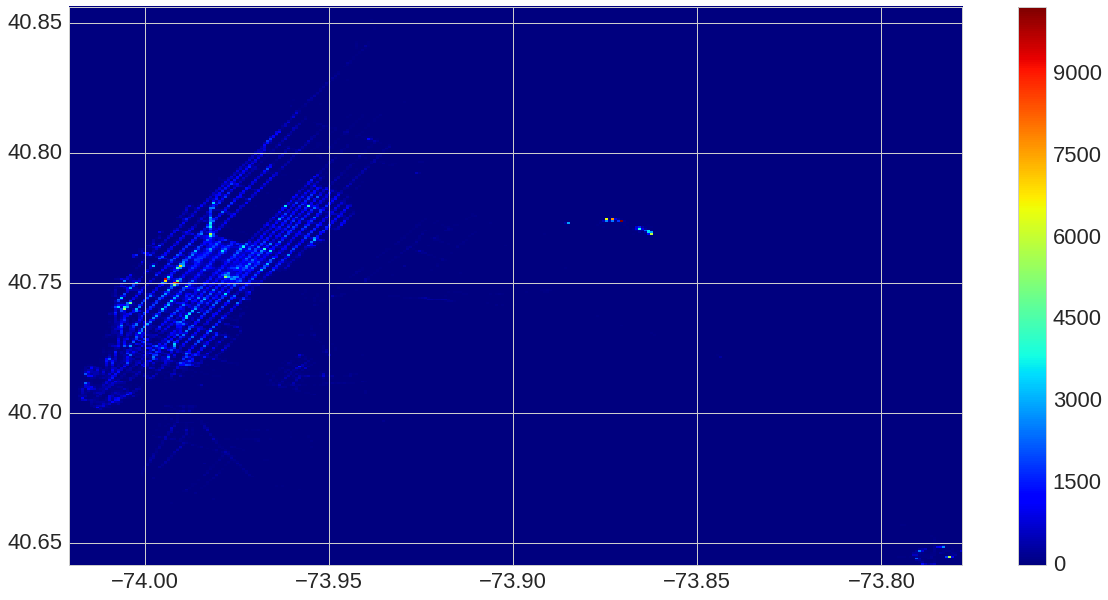

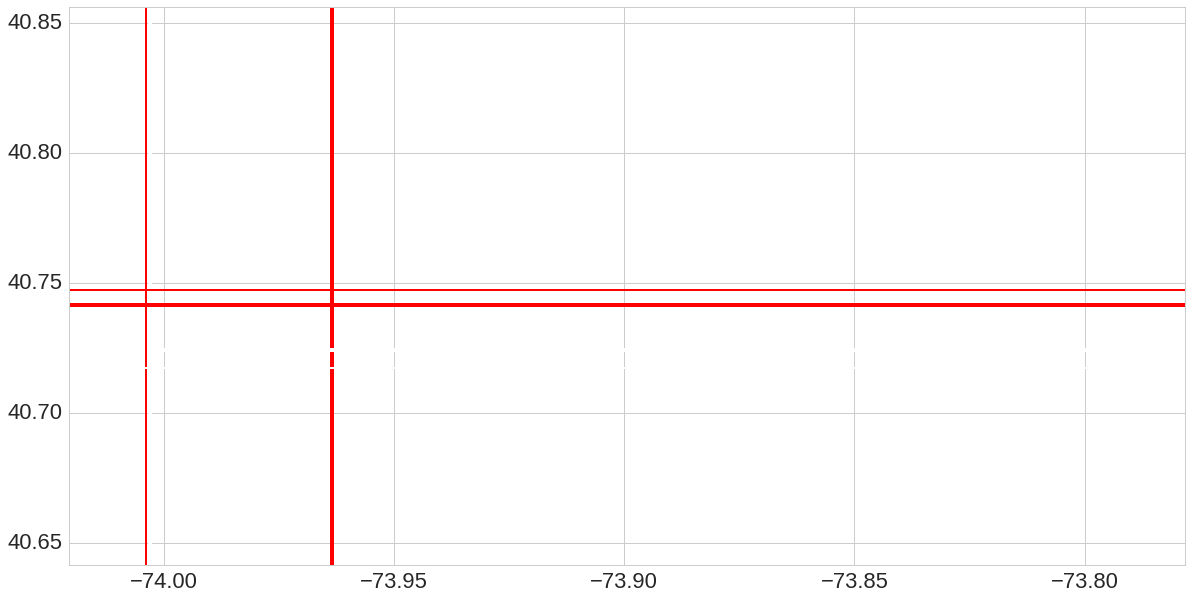

In [151]:
x = data_in_box.pickup_longitude
y = data_in_box.pickup_latitude

H, xedges, yedges = np.histogram2d(x, y, bins=300)#, normed=False, weights=None)

fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
# mesh = plt.pcolormesh(X, Y, H)
plt.hist2d(x, y, bins=300, )
plt.colorbar()
# plt.colorbar(mesh)
# plt.xticks(xedges)
# plt.yticks(yedges)
# plt.axis([min(xedges), max(xedges), min(yedges), max(yedges)])
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')



## Plot the horizontal / vertival lines here via eventplot
plt.hold(True)
plt.figure(figsize=(20, 10))
#get_rule(regtree, time_regression_df.ix[:,0:6].columns,112930)
droli = 4
pili = 2
leqcol = [1,0,0]
grecol = [1,1,1]
# Try-except: not so good because it stops after the error. Better would be a try-except for every line, but this is not handsome
try:
    plt.hold(True)
    plt.axvline(trip[0][1],linewidth = droli, color = leqcol)
    plt.axvline(trip[1][1],linewidth = droli, color = grecol)
    plt.axhline(trip[2][1],linewidth = droli, color = leqcol)
    plt.axhline(trip[3][1],linewidth = droli, color = grecol)
    plt.axvline(trip[4][1],linewidth = pili, color = leqcol)
    #plt.axvline(trip[5][1],linewidth = pili, color = grecol)
    plt.axhline(trip[6][1],linewidth = pili, color = leqcol)
    plt.axhline(trip[7][1],linewidth = pili, color = grecol)
except TypeError:
    print('threw TypeError')
#plt.axis([40.62, 40.76, -74.1, -73.8])
plt.axis([min(xedges), max(xedges), min(yedges), max(yedges)])
#plt.axis([slb*latmin,sub*latmax,sub*lomin,slb*lomax])
#plt.hold(False)

In [216]:
print('dropoff upper left:', [trip[3][1],trip[0][1]],
     'dropoff lower right:', [trip[2][1],trip[1][1]])
print('pickup upper left:', [trip[7][1],trip[4][1]],
     'pickup lower right:', [trip[6][1],trip[5][1]])

[-74.02063   -74.0182049 -74.0157798 -74.0133547 -74.0109296 -74.0085045
 -74.0060794 -74.0036543 -74.0012292 -73.9988041 -73.996379  -73.9939539
 -73.9915288 -73.9891037 -73.9866786 -73.9842535 -73.9818284 -73.9794033
 -73.9769782 -73.9745531 -73.972128  -73.9697029 -73.9672778 -73.9648527
 -73.9624276 -73.9600025 -73.9575774 -73.9551523 -73.9527272 -73.9503021
 -73.947877  -73.9454519 -73.9430268 -73.9406017 -73.9381766 -73.9357515
 -73.9333264 -73.9309013 -73.9284762 -73.9260511 -73.923626  -73.9212009
 -73.9187758 -73.9163507 -73.9139256 -73.9115005 -73.9090754 -73.9066503
 -73.9042252 -73.9018001 -73.899375  -73.8969499 -73.8945248 -73.8920997
 -73.8896746 -73.8872495 -73.8848244 -73.8823993 -73.8799742 -73.8775491
 -73.875124  -73.8726989 -73.8702738 -73.8678487 -73.8654236 -73.8629985
 -73.8605734 -73.8581483 -73.8557232 -73.8532981 -73.850873  -73.8484479
 -73.8460228 -73.8435977 -73.8411726 -73.8387475 -73.8363224 -73.8338973
 -73.8314722 -73.8290471 -73.826622  -73.8241969 -7

In [237]:
X.size,Y.size, H.size

(10201, 10201, 10000)

In [174]:
trip[1][1]

-74.003044128417969

In [149]:
next((i for i in range(500) if i > 600), 600) 

600

In [144]:
type(a.items())

dict_items

In [127]:
next(i for i in range(100000) if i == 1000)

1000

Leaf: 112930
1
Node: 112930  with  dropoff_latitude > -2.0 is right of: 112928
vert
2
Node: 112928  with  dropoff_longitude > -74.0030441284 is right of: 112924
hor
3
Node: 112924  with  pickup_longitude <=  -74.0040206909 is left of 112923
hor
4
Node: 112923  with  pickup_latitude <=  40.7473983765 is left of 112922
vert
5
Node: 112922  with  dropoff_latitude <=  40.741607666 is left of 112921
vert
6
Node: 112921  with  dropoff_longitude <=  -73.9636077881 is left of 112920
hor
7
Node: 112920  with  pickup_latitude <=  40.75025177 is left of 112919
vert
8
Node: 112919  with  pickup_latitude <=  40.7558288574 is left of 112918
vert
9
Node: 112918  with  dropoff_latitude <=  40.7464828491 is left of 112917
vert
10
Node: 112917  with  pickup_longitude <=  -73.9626312256 is left of 112916
hor
11
Node: 112916  with  pickup_latitude <=  40.7738380432 is left of 112915
vert
12
Node: 112915  with  dropoff_latitude <=  40.7698669434 is left of 112914
vert
13
Node: 112914  with  pickup_datetime

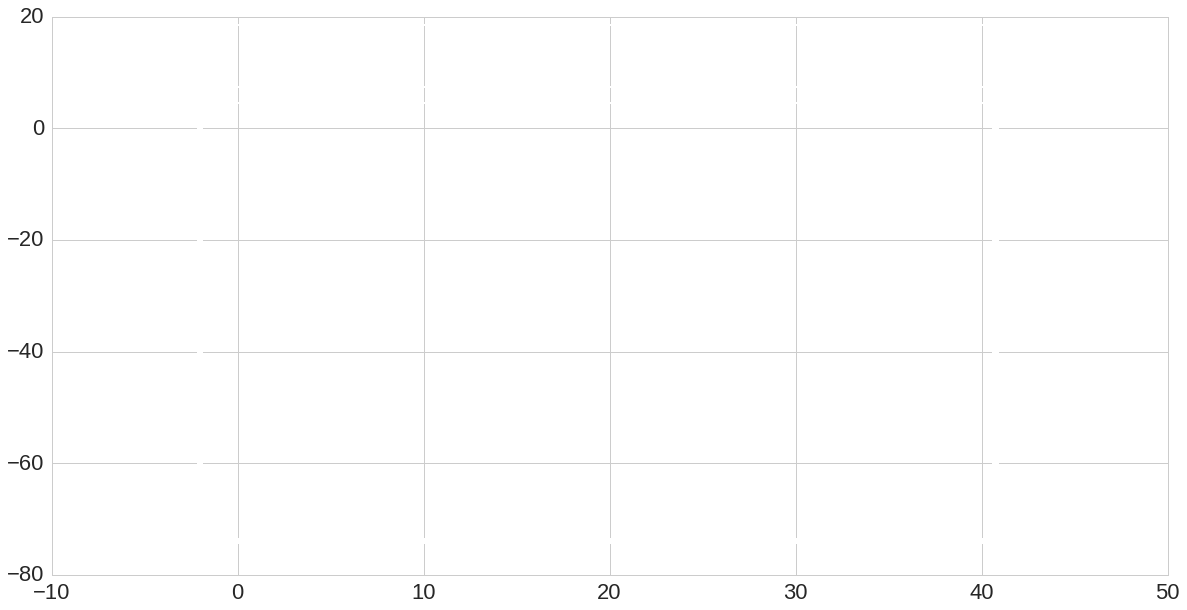

In [269]:
print(get_rule(regtree, time_regression_df.ix[:,0:6].columns,112930))

In [192]:
regtree.tree_.threshold

array([-73.88609314, -73.88708496,  40.71197891, ...,  40.84429169,
        -2.        ,  -2.        ])

In [182]:
right

array([186772, 147941,  55176, ..., 239636,     -1,     -1])

In [390]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value
        samples = tree.tree_.n_node_samples
        
        f = open('test.txt', 'w')
        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        f.write("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        f.write( "} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        f.write( "}")
                else:
                        f.write( "return " + str(value[node])+ ', samples: ' + str(samples[node]) + "\n")

        recurse(left, right, threshold, features, 0)

In [391]:
ruleset = get_code(regtree, feature_names=time_regression_df.ix[:,0:6].columns);

In [397]:
f=open('test.txt')
lines=f.readlines()
print(lines[56458])

} else {return [[ 7.34481479]], samples: 53884



In [124]:
from sklearn import tree
# tree.export_graphviz(regtree, out_file='figures/tree_d20.dot', feature_names=time_regression_df.ix[:,0:6].columns, class_names=time_regression_df.columns[6])    

In [111]:
print(len(regtree.tree_.feature))
print(regtree.tree_.capacity)
print(regtree.tree_.children_left)
print(regtree.tree_.children_right)

239637
239637
[     1      2      3 ..., 239635     -1     -1]
[186772 147941  55176 ..., 239636     -1     -1]


In [116]:
regtree.tree_.children_left[1:100]

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  -1,  18,  -1,  -1,  21,  22,  23,  -1,  -1,  26,  27,
        -1,  29,  -1,  -1,  32,  33,  -1,  -1,  36,  -1,  -1,  -1,  40,
        41,  42,  43,  -1,  -1,  -1,  47,  48,  49,  50,  -1,  -1,  53,
        -1,  -1,  56,  57,  -1,  -1,  60,  -1,  -1,  -1,  64,  65,  66,
        67,  -1,  -1,  70,  71,  -1,  -1,  74,  -1,  -1,  77,  78,  -1,
        -1,  -1,  82,  83,  84,  -1,  -1,  -1,  -1,  89,  90,  91,  -1,
        93,  94,  -1,  96,  97,  -1,  -1, 100])

Prepare a dictionary to look uop the features that are splitted in the nodes

In [119]:
feature_dict = {}
for i in range(0,6):
    feature_dict[i] = time_regression_df.ix[:,i].name
print(feature_dict)

{0: 'pickup_datetime_dayofweek', 1: 'pickup_datetime_hour', 2: 'pickup_latitude', 3: 'pickup_longitude', 4: 'dropoff_latitude', 5: 'dropoff_longitude'}


In [120]:
feature_splits = list(regtree.tree_.feature)
for i in range(0,len(regtree.tree_.feature)):
    if feature_splits[i] >= 0:
        feature_splits[i] = feature_dict[feature_splits[i]]

In [127]:
print(feature_splits[0:20])
print(regtree.tree_.threshold[0:20])

['pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_latitude', 'pickup_latitude', 'dropoff_latitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_latitude', 'pickup_latitude', 'pickup_datetime_hour', 'pickup_datetime_dayofweek', 'pickup_latitude', 'dropoff_latitude', 'pickup_datetime_hour', -2, 'pickup_datetime_hour', -2, -2]
[-73.88609314 -73.88708496  40.71197891  40.73434448  40.72146606
  40.70143509  40.70318985 -73.94831848  40.66032028  40.68427277
  40.67595673   6.5          3.5         40.66175461  40.64271545   2.5
  -2.           5.5         -2.          -2.        ]


In [128]:
# from http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print( "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print( "} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}")
                else:
                        print( "return " + str(value[node]))

        recurse(left, right, threshold, features, 0)

In [129]:
# from http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
def get_code_matrix(tree, feature_names):
        decision_list = []
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value
        #frame =  pd.DataFrame(np.nan, columns=['leaf_no', range(1,tree.tree_.max_depth), 'value'])

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        decision_list.append({str(features[node]):threshold[node]})
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        decision_list.append({'back': -1})
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        decision_list.append({'back': -1})
                else:
                        decision_list.append({'leaf_val':value[node][0][0]})

        recurse(left, right, threshold, features, 0) # root node
        return decision_list

In [131]:
a = get_code_matrix(regtree, feature_names=time_regression_df.ix[:,0:6].columns)

In [132]:
a[0:20]

[{'pickup_longitude': -73.886093139648438},
 {'dropoff_longitude': -73.8870849609375},
 {'dropoff_latitude': 40.711978912353516},
 {'pickup_latitude': 40.734344482421875},
 {'pickup_latitude': 40.721466064453125},
 {'dropoff_latitude': 40.701435089111328},
 {'pickup_latitude': 40.703189849853516},
 {'dropoff_longitude': -73.948318481445312},
 {'dropoff_latitude': 40.660320281982422},
 {'pickup_latitude': 40.684272766113281},
 {'pickup_latitude': 40.675956726074219},
 {'pickup_datetime_hour': 6.5},
 {'pickup_datetime_dayofweek': 3.5},
 {'pickup_latitude': 40.661754608154297},
 {'dropoff_latitude': 40.642715454101562},
 {'pickup_datetime_hour': 2.5},
 {'leaf_val': 6.0},
 {'back': -1},
 {'pickup_datetime_hour': 5.5},
 {'leaf_val': 9.0}]

In [133]:
len(a)

479273

In [134]:
a[0:20]

[{'pickup_longitude': -73.886093139648438},
 {'dropoff_longitude': -73.8870849609375},
 {'dropoff_latitude': 40.711978912353516},
 {'pickup_latitude': 40.734344482421875},
 {'pickup_latitude': 40.721466064453125},
 {'dropoff_latitude': 40.701435089111328},
 {'pickup_latitude': 40.703189849853516},
 {'dropoff_longitude': -73.948318481445312},
 {'dropoff_latitude': 40.660320281982422},
 {'pickup_latitude': 40.684272766113281},
 {'pickup_latitude': 40.675956726074219},
 {'pickup_datetime_hour': 6.5},
 {'pickup_datetime_dayofweek': 3.5},
 {'pickup_latitude': 40.661754608154297},
 {'dropoff_latitude': 40.642715454101562},
 {'pickup_datetime_hour': 2.5},
 {'leaf_val': 6.0},
 {'back': -1},
 {'pickup_datetime_hour': 5.5},
 {'leaf_val': 9.0}]

In [135]:
decisions = np.ndarray(shape=(2**regtree.tree_.max_depth, 2*regtree.tree_.max_depth+2), dtype = '<U30')

In [136]:
m = 0
n = 0
for i in range(0,len(a)):
    if (list(a[i].values()) != [-1]):
        #print(n)
        #print(i)
        #print('if')
        #print(list(a[i].keys()) == ['leaf_val'])
        #print(decisions[m,n])
        decisions[m,2*n] = list(a[i].keys())[0]
        decisions[m,2*n+1] = list(a[i].values())[0]
        n = n+1
        #print(n)
    if (list(a[i].keys()) == ['leaf_val']):
        #print('elif')
        m = m+1
        #print(n)
    elif(list(a[i].values()) == [-1]):
        #print('else')
        n = n-1
    #print(n,m)

In [137]:
decisions

array([['pickup_longitude', '-73.8860931396', 'dropoff_longitude', ..., '',
        '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ..., 
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', '']], 
      dtype='<U30')

In [138]:
np.savetxt('decisions.txt', decisions, fmt='%s', delimiter=',')

# decisions.nonzero(): Try somehow to replace the 'None'-values with 'same' or something like that

Index(['pickup_datetime_dayofweek', 'pickup_datetime_hour', 'pickup_latitude',
       'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
       'trip_time'],
      dtype='object')


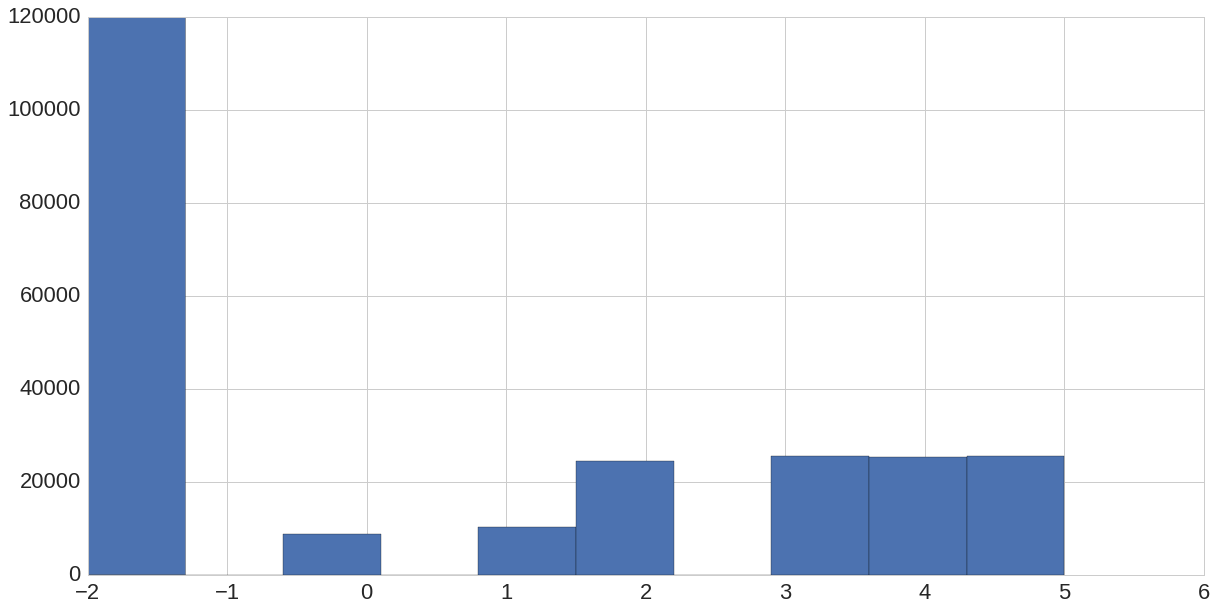

In [205]:
plt.hist(regtree.tree_.feature, align='mid')
print(time_regression_df.columns)

In [398]:
decisionsdf = pd.read_csv('decisions.txt', header=None)

/home/niklas/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [399]:
split_vals = decisionsdf.iloc[0][1:41:2]
long_splits = split_vals[(split_vals>=-75) & (split_vals<=-70)]
lat_splits = split_vals[(split_vals>=40) & (split_vals<=41)]
time_splits = split_vals[(split_vals>=0) & (split_vals<=24) & (split_vals % 1 ==.5)] # because the splits are not decimal are leaf values!

In [400]:
split_vals

1    -73.8861
3    -73.8871
5      40.712
7     40.7343
9     40.7215
11    40.7014
13    40.7032
15   -73.9483
17    40.6603
19    40.6843
21     40.676
23        6.5
25        3.5
27    40.6618
29    40.6427
31        2.5
33          6
35        NaN
37        NaN
39        NaN
Name: 0, dtype: object

In [401]:
split_keys = decisionsdf.iloc[0][0:40:2]

In [402]:
split_keys

0              pickup_longitude
2             dropoff_longitude
4              dropoff_latitude
6               pickup_latitude
8               pickup_latitude
10             dropoff_latitude
12              pickup_latitude
14            dropoff_longitude
16             dropoff_latitude
18              pickup_latitude
20              pickup_latitude
22         pickup_datetime_hour
24    pickup_datetime_dayofweek
26              pickup_latitude
28             dropoff_latitude
30         pickup_datetime_hour
32                     leaf_val
34                          NaN
36                          NaN
38                          NaN
Name: 0, dtype: object

In [403]:
h = np.column_stack((split_keys.values, split_vals.values))
h

array([['pickup_longitude', -73.886093139600007],
       ['dropoff_longitude', -73.887084960899998],
       ['dropoff_latitude', 40.711978912399999],
       ['pickup_latitude', 40.734344482399997],
       ['pickup_latitude', 40.7214660645],
       ['dropoff_latitude', 40.701435089099995],
       ['pickup_latitude', 40.703189849899999],
       ['dropoff_longitude', -73.948318481400008],
       ['dropoff_latitude', 40.660320282000001],
       ['pickup_latitude', 40.684272766100001],
       ['pickup_latitude', 40.675956726100004],
       ['pickup_datetime_hour', 6.5],
       ['pickup_datetime_dayofweek', 3.5],
       ['pickup_latitude', 40.661754608199999],
       ['dropoff_latitude', 40.642715454099999],
       ['pickup_datetime_hour', 2.5],
       ['leaf_val', 6.0],
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=object)

In [404]:
print(h[h[:,0]=='pickup_latitude'],
    h[h[:,0]=='pickup_longitude'],
    h[h[:,0]=='dropoff_latitude'],
    h[h[:,0]=='dropoff_longitude'],
    h[h[:,0]=='pickup_datetime_dayofweek'],
    h[h[:,0]=='pickup_datetime_hour'],
    h[h[:,0]=='leaf_val'])

[['pickup_latitude' 40.734344482399997]
 ['pickup_latitude' 40.7214660645]
 ['pickup_latitude' 40.703189849899999]
 ['pickup_latitude' 40.684272766100001]
 ['pickup_latitude' 40.675956726100004]
 ['pickup_latitude' 40.661754608199999]] [['pickup_longitude' -73.886093139600007]] [['dropoff_latitude' 40.711978912399999]
 ['dropoff_latitude' 40.701435089099995]
 ['dropoff_latitude' 40.660320282000001]
 ['dropoff_latitude' 40.642715454099999]] [['dropoff_longitude' -73.887084960899998]
 ['dropoff_longitude' -73.948318481400008]] [['pickup_datetime_dayofweek' 3.5]] [['pickup_datetime_hour' 6.5]
 ['pickup_datetime_hour' 2.5]] [['leaf_val' 6.0]]


In [405]:
pila_splits = h[h[:,0]=='pickup_latitude'][:,1]
pilo_splits = h[h[:,0]=='pickup_longitude'][:,1]
drola_splits = h[h[:,0]=='dropoff_latitude'][:,1]
drolo_splits = h[h[:,0]=='dropoff_longitude'][:,1]
pidada_splits = h[h[:,0]=='pickup_datetime_dayofweek'][:,1]
pidaho_splits = h[h[:,0]=='pickup_datetime_hour'][:,1]
leval = h[h[:,0]=='leaf_val'][:,1]

In [406]:
long_splits

1    -73.8861
3    -73.8871
15   -73.9483
Name: 0, dtype: object

In [407]:
decisionsdf.head(2)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,pickup_longitude,-73.886093,dropoff_longitude,-73.887085,dropoff_latitude,40.711979,pickup_latitude,40.734344,pickup_latitude,40.721466,...,leaf_val,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,pickup_datetime_hour,5.5,leaf_val,9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [408]:
drola_splits

array([40.711978912399999, 40.701435089099995, 40.660320282000001,
       40.642715454099999], dtype=object)

AttributeError: Unknown property linestyles

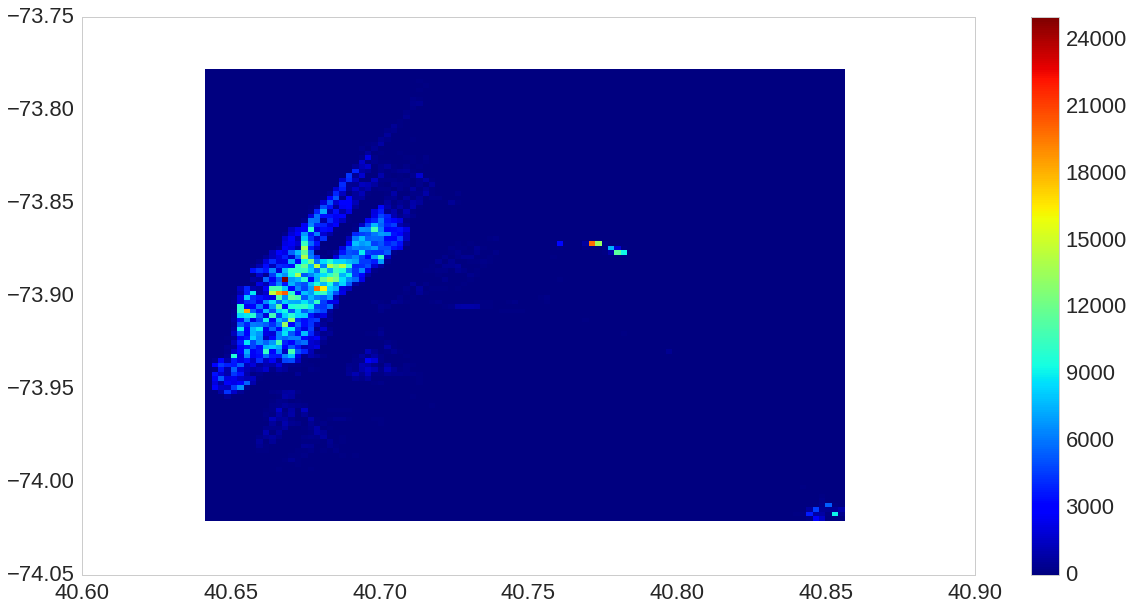

In [409]:
x = data_in_box.pickup_latitude
y = data_in_box.pickup_longitude

H, xedges, yedges = np.histogram2d(x, y, bins=100, normed=False, weights=None)

plt.jet()
fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
mesh = plt.pcolormesh(X, Y, H)
plt.colorbar(mesh)
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')



## Plot the horizontal / vertival lines here via eventplot
plt.hold(True)
plt.axhline(min(pila_splits),color = [[1,0,0]], linestyles='solid')
plt.axvline(min(pilo_splits), color = [[1,0,0]], linestyles='solid')
plt.axhline(min(drola_splits), color = [[1,1,1]], linestyles='solid')
plt.axvline(min(drolo_splits), color = [[1,1,1]],linestyles='solid')

plt.eventplot(min(pila_splits), orientation='horizontal', lineoffsets=-73.9,
          linelengths=0.2, linewidths=None, color = [[1,0,0]],
          linestyles='solid')
plt.eventplot(min(pilo_splits), orientation='vertical', lineoffsets=40.75,
          linelengths=.2, linewidths=None, color = [[1,0,0]],
          linestyles='solid')
plt.eventplot(min(drola_splits), orientation='horizontal', lineoffsets=-73.9,
          linelengths=0.2, linewidths=None, color = [[1,1,1]],
          linestyles='solid')
plt.eventplot(min(drolo_splits), orientation='vertical', lineoffsets=40.75,
          linelengths=.2, linewidths=None, color = [[1,1,1]],
          linestyles='solid')
latmin = min(np.hstack([pila_splits, drola_splits]))
latmax = max(np.hstack([pila_splits, drola_splits]))
lomin = min(np.hstack([pilo_splits, drolo_splits]))
lomax = max(np.hstack([pilo_splits, drolo_splits]))
slb = 0.9999 # scale lower bound
sub = 1.0001#scale upper bound 
plt.axis([slb*latmin,sub*latmax,sub*lomin,slb*lomax])
# plt.axis([xedges.min(),xedges.max(),yedges.min(),yedges.max()]) # zoom in
plt.hold(False)
print('Time splits: ',time_splits.values,
     'Pickup: Red, Dropoff: White')

Time splits:  [6.5 3.5 2.5] Pickup: Red, Dropoff: White


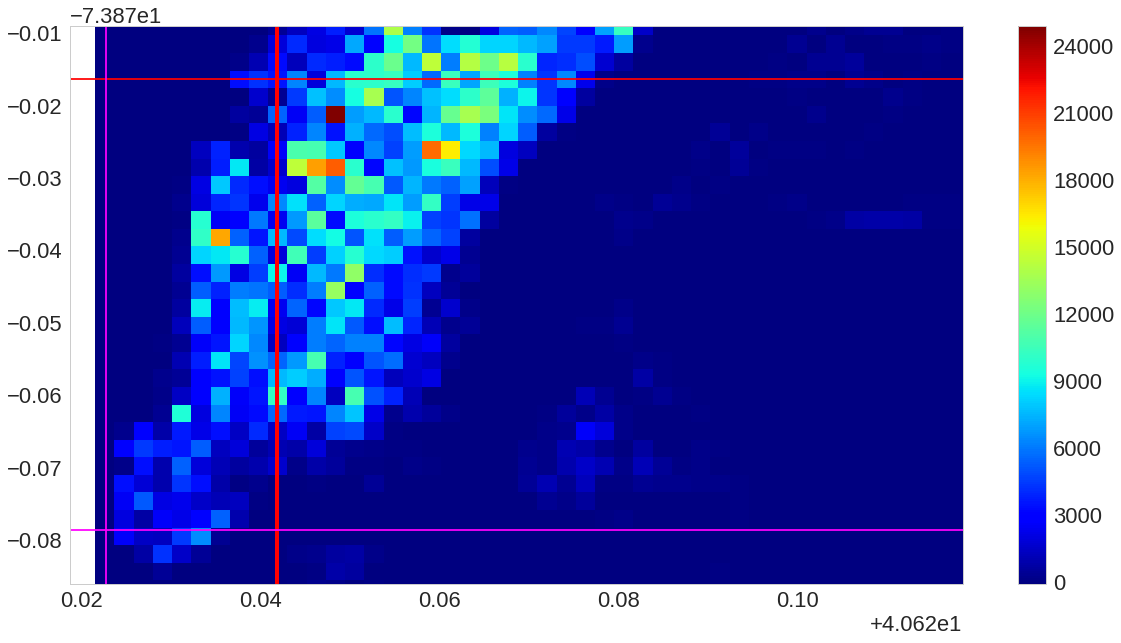

In [410]:
x = data_in_box.pickup_latitude
y = data_in_box.pickup_longitude

H, xedges, yedges = np.histogram2d(x, y, bins=100, normed=False, weights=None)

plt.jet()
fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
mesh = plt.pcolormesh(X, Y, H)
plt.colorbar(mesh)
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')



## Plot the horizontal / vertival lines here via eventplot
plt.hold(True)
plt.axvline(min(pila_splits),linewidth = 4, color = [1,0,0])
plt.axhline(min(pilo_splits), color = [1,0,0])
plt.axvline(min(drola_splits), color = [1,0,1])
plt.axhline(min(drolo_splits), color = [1,0,1])

latmin = min(np.hstack([pila_splits, drola_splits]))
latmax = max(np.hstack([pila_splits, drola_splits]))
lomin = min(np.hstack([pilo_splits, drolo_splits]))
lomax = max(np.hstack([pilo_splits, drolo_splits]))
slb = 0.9999 # scale lower bound
sub = 1.0001#scale upper bound 
plt.axis([slb*latmin,sub*latmax,sub*lomin,slb*lomax])
# plt.axis([xedges.min(),xedges.max(),yedges.min(),yedges.max()]) # zoom in
plt.hold(True)
print('Time splits: ',time_splits.values,
     'Pickup: Red, Dropoff: White')

Normally, the decisionsdf should include all decision rules for the leaves. Therefore the number of rows should equal the number of leaves.

In [350]:
decisionsdf.shape

(1048576, 42)

In [351]:
len(leaf_samples)

239637

In [ ]:
regtree.tree_.

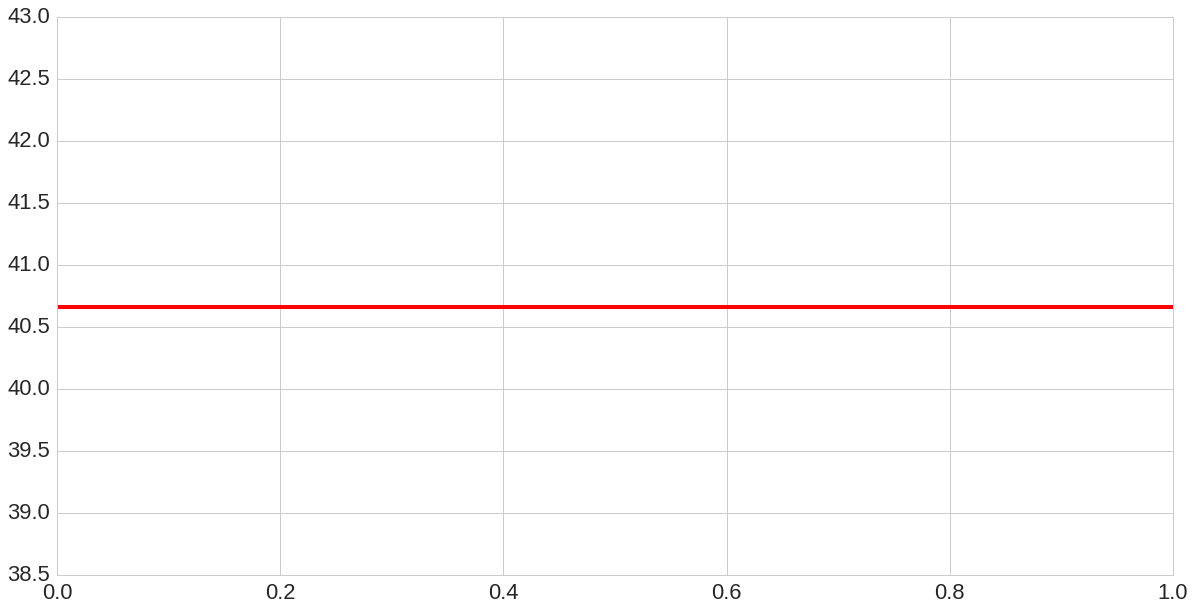

In [344]:
plt.axhline(min(pila_splits),linewidth = 4, color = [1,0,0])

In [303]:
#[pila_splits[0], drola_splits[0]]
np.hstack([pila_splits, drola_splits])

array([40.734344482399997, 40.7214660645, 40.703189849899999,
       40.684272766100001, 40.675956726100004, 40.661754608199999,
       40.711978912399999, 40.701435089099995, 40.660320282000001,
       40.642715454099999], dtype=object)

Time splits:  [6.5 3.5 2.5]


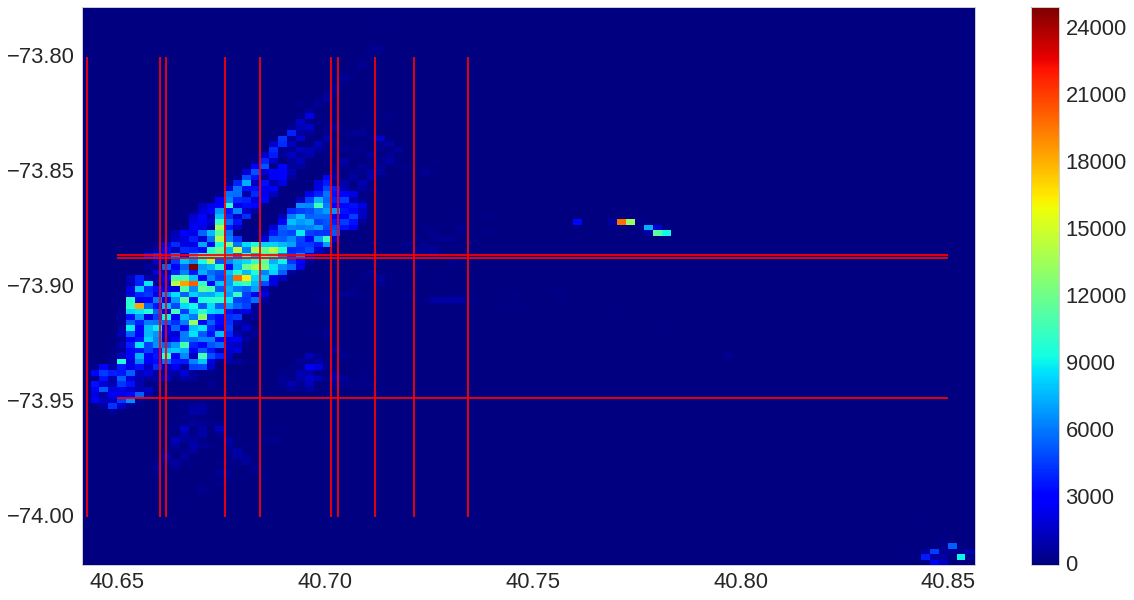

In [275]:
x = data_in_box.pickup_latitude
y = data_in_box.pickup_longitude

H, xedges, yedges = np.histogram2d(x, y, bins=100, normed=False, weights=None)

plt.jet()
fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
mesh = plt.pcolormesh(X, Y, H)
plt.colorbar(mesh)
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')

## Plot the horizontal / vertival lines here via eventplot
plt.hold(True)
plt.eventplot(lat_splits, orientation='horizontal', lineoffsets=-73.9,
          linelengths=0.2, linewidths=None, color = [[1,0,0]],
          linestyles='solid')
plt.eventplot(long_splits, orientation='vertical', lineoffsets=40.75,
          linelengths=.2, linewidths=None, color = [[1,0,0]],
          linestyles='solid')
plt.axis([xedges.min(),xedges.max(),yedges.min(),yedges.max()]) # zoom in
plt.hold(False)
print('Time splits: ',time_splits.values)

In [106]:
t = time.time()

In [107]:
from sklearn.ensemble import RandomForestRegressor

rd_regtree = RandomForestRegressor(n_estimators=20,n_jobs=6,min_samples_split=3, random_state=99, max_depth=30) 
#total sum of diff: 1132
#rd_regtree = RandomForestRegressor(n_estimators=40,n_jobs=-1,min_samples_split=3, random_state=99, max_depth=11)
#total sum of diff: 1129
rd_regtree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=6, oob_score=False, random_state=99,
           verbose=0, warm_start=False)

In [108]:
elapsed_rd_regtree = time.time() - t
print(elapsed_rd_regtree)

132.25388717651367


In [109]:
print(rd_regtree.score(X_test, y_test))

0.781197297783


Perzentile(%):  [1, 5, 10, 15, 25, 50, 75, 90, 95, 99] 
 [-16.28910841  -8.          -5.10597508  -3.9375      -2.           0.13333333
   2.1875       5.           7.97222222  16.        ]
Absolute time deviation (in 1k):  1137.1543402


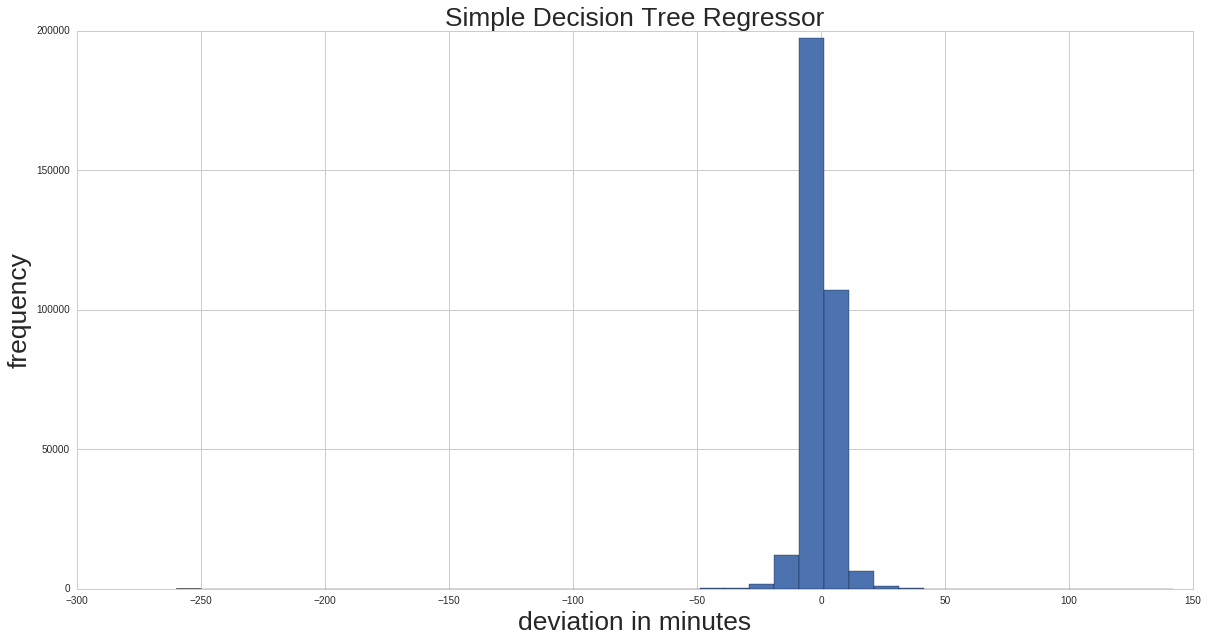

In [110]:
y_pred = regtree.predict(X_test)
np.linalg.norm(np.ceil(y_pred)-y_test)
diff = (y_pred-y_test)
# plt.figure(figsize=(12,10)) # not needed. set values globally
plt.hist(diff.values, bins=40)
print('Perzentile(%): ', [1,5,10,15,25,50,75,90,95,99], '\n', np.percentile(diff.values, [1,5,10,15,25,50,75,90,95,99]))
print('Absolute time deviation (in 1k): ', sum(abs(diff))/1000)
plt.title('Simple Decision Tree Regressor')
plt.xlabel('deviation in minutes')
plt.ylabel('frequency')

In [111]:
from sklearn.externals import joblib
joblib.dump(regtree, 'treelib/regtree_depth_30_PY27.pkl', protocol=2) 

['treelib/regtree_depth_30_PY27.pkl',
 'treelib/regtree_depth_30_PY27.pkl_01.npy',
 'treelib/regtree_depth_30_PY27.pkl_02.npy',
 'treelib/regtree_depth_30_PY27.pkl_03.npy']

In [112]:
regtree.tree_.max_depth

30

Perzentile(%):  [1, 5, 10, 15, 25, 50, 75, 90, 95, 99] 
 [-14.01453106  -6.6752769   -4.14994509  -2.85833333  -1.41638855
   0.49666667   2.09583333   3.8125       5.25416667   9.665     ]
Absolute time deviation (in 1k):  889.788218541


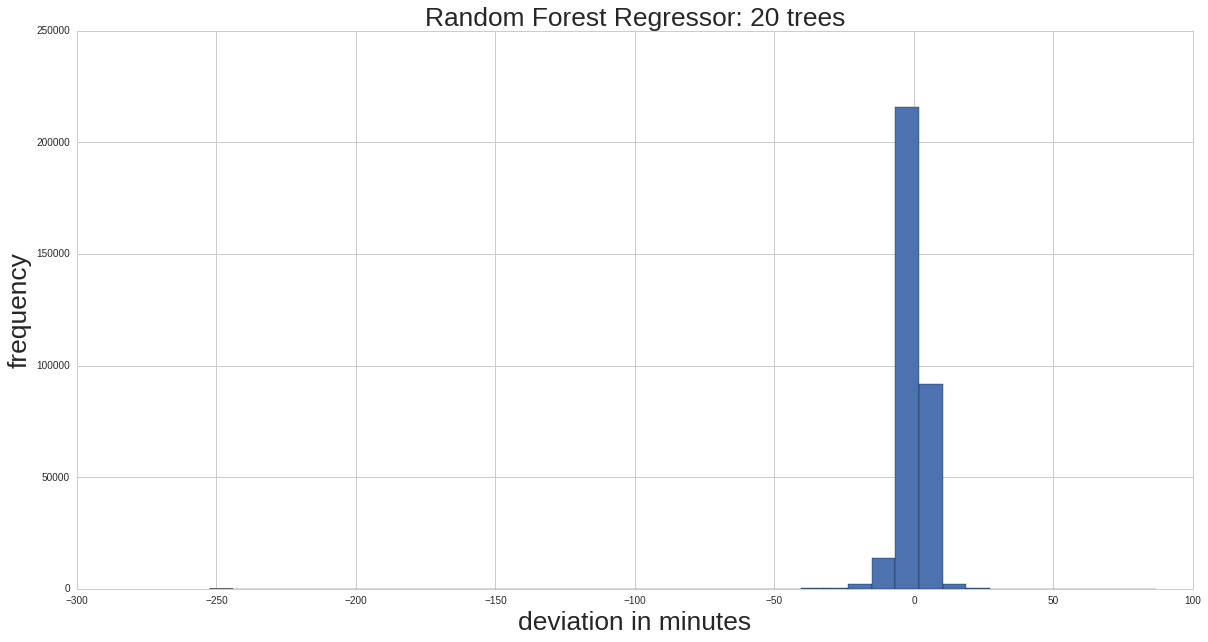

In [113]:
percentiles = [1,5,10,15,25,50,75,90,95,99]
y_pred = rd_regtree.predict(X_test)
np.linalg.norm(y_pred-y_test)
diff = (y_pred-y_test)
#plt.figure(figsize=(12,10))
plt.hist(diff.values, bins=40)
print('Perzentile(%): ', percentiles , '\n', np.percentile(diff.values, percentiles))
print('Absolute time deviation (in 1k): ', sum(abs(diff))/1000)
plt.title('Random Forest Regressor: 20 trees')
plt.xlabel('deviation in minutes')
plt.ylabel('frequency')

In [114]:
from sklearn.externals import joblib
joblib.dump(rd_regtree, 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl', protocol=2)

['randforlib/regtree_20x_depth_30_PY27.pkl.pkl',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_01.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_02.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_03.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_04.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_05.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_06.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_07.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_08.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_09.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_10.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_11.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_12.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_13.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_14.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_15.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_16.npy',
 'randforlib/regtree_20x_depth_30_PY27.pkl.pkl_17.npy',

In [115]:
! cd randforlib && zip regtree_20x_depth_30.zip regtree_20x_depth_30_PY27.pkl.pkl*

  adding: regtree_20x_depth_30_PY27.pkl.pkl (deflated 73%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_01.npy (deflated 19%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_02.npy (deflated 81%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_03.npy (deflated 70%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_04.npy (deflated 19%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_05.npy (deflated 81%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_06.npy (deflated 70%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_07.npy (deflated 19%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_08.npy (deflated 81%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_09.npy (deflated 70%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_10.npy (deflated 19%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_11.npy (deflated 81%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_12.npy (deflated 70%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_13.npy (deflated 19%)
  adding: regtree_20x_depth_30_PY27.pkl.pkl_14.npy (deflated 81%)
  adding: regtree

## Read as follows: Split # x results in the children_left[x] and children_right[x], etc. Means: go to the left, and then step by step to the right...

In [130]:
print('cleft: ' + str(regtree.tree_.children_left) + '\n\n', #array of left children
      'cright: ' + str(regtree.tree_.children_right) + '\n\n', #array of right children
    regtree.tree_.feature, '\n\n',#array of nodes splitting feature
    regtree.tree_.threshold, '\n\n', #array of nodes splitting points
    #regtree.tree_.value
     ) #array of nodes values

cleft: [   1    2    3 ..., 1605   -1   -1]

 cright: [ 894  507  254 ..., 1606   -1   -1]

 [ 4  6  5 ...,  5 -2 -2] 

 [-73.88609314 -73.87641144  40.71151733 ...,  40.83932495  -2.          -2.        ] 




numpy.ndarray(regtree.tree_.children_left #array of left children
regtree.tree_.children_right #array of right children
regtree.tree_.feature #array of nodes splitting feature
regtree.tree_.threshold #array of nodes splitting points
regtree.tree_.value #array of nodes values

## Finding leaves:

In [131]:
leaves = regtree.tree_.children_left*regtree.tree_.children_right
for idx, a in enumerate(leaves):
    if a==1:
        x=1# do nothing
    else:
        leaves[idx] = 0
print(leaves)

[0 0 0 ..., 0 1 1]


## Now we've found the leaves

In [132]:
regtree.tree_.compute_feature_importances()

array([ 0.00201552,  0.02067813,  0.05331978,  0.17284459,  0.30449187,
        0.13772981,  0.3089203 ])

# Seems that the first 3 features are quite irrelevant right now...

In [133]:
splits = regtree.tree_.threshold

[  7.5  10.5   5.5   5.5   7.5   9.5  20.5   9.5  17.5   6.5   7.5  17.5
  10.5   6.5  17.5   6.5   7.5   6.5  17.5   6.5   5.5   7.5   6.5   6.5
  17.5  10.5   7.5   7.5   7.5   6.5  19.5   6.5   6.5  17.5   7.5   6.5
   6.5   6.5  18.5  18.5   6.5  10.5   5.5   5.5   7.5  19.5  18.5   4.5
  11.5   6.5  17.5   6.5   9.5   7.5   8.5   9.5   0.5  19.   14.5   4.5
  17.5   9.5   6.5  17.5   2.5  20.5   6.5  18.5   3.5  14.5  20.5   4.5
  14.   20.    9.5   2.5  17.5  15.5  11.   13.5  12.5   8.5   2.    1.5
  10.5  16.5   6.5  14.5   4.5  14.5  11.5  17.5   4.5   7.5  17.5  10.5
   7.5  19.   17.   13.5   8.5  18.5  19.5  12.5   8.5  15.5  14.5  22.5
   7.5   3.5  13.5   4.5   1.5   9.5   6.5   3.5   6.5   3.5   8.5   6.5
   9.5   8.5   6.5   7.5   0.5   5.5   8.5  10.5  17.5   3.5  16.5  14.5
  11.5   3.5   2.5  11.5  18.5  10.5   4.5   6.5  19.5  22.5  19.5  15.5
  21.   13.5   7.5  13.5  13.5   6.5  14.5  17.5  12.5   5.   10.5   7.5
  10.5   3.5   4.5  18.5   7.5   4.5   5.5   3.   2

(array([ 10.,  21.,  36.,  27.,  22.,  18.,  12.,  20.,  19.,  10.]),
 array([  0.5,   2.7,   4.9,   7.1,   9.3,  11.5,  13.7,  15.9,  18.1,
         20.3,  22.5]),
 <a list of 10 Patch objects>)

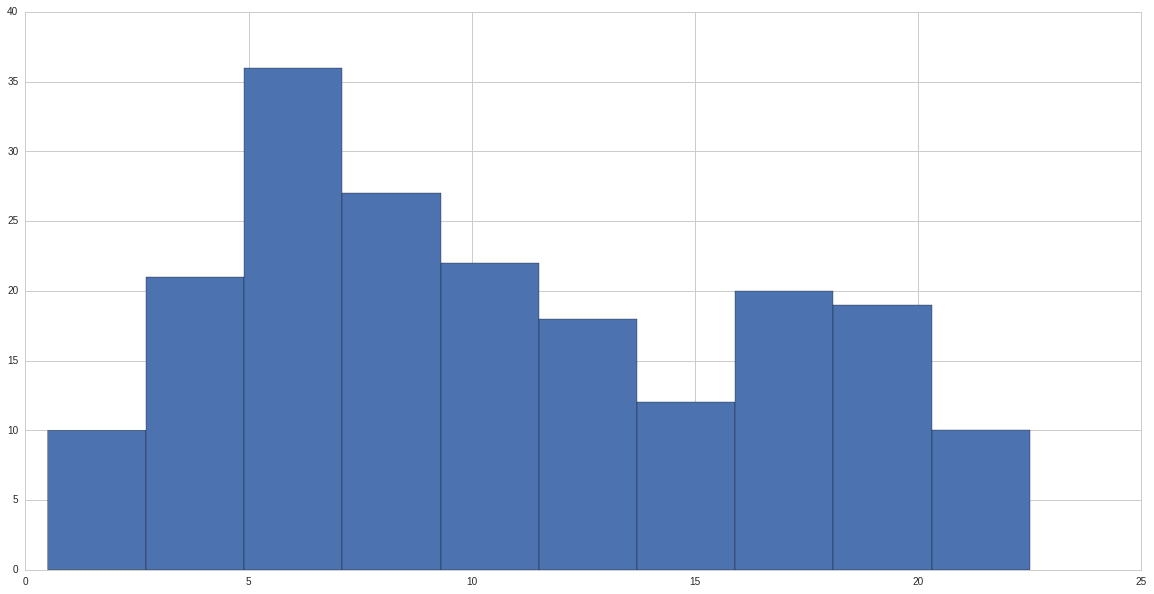

In [134]:
time_splits = splits[(splits>=0) & (splits<=24)]
print(time_splits)
plt.hist(time_splits)

# Where are splits in the hour?

# Filter the splits in longitudinal and latitudinal data

In [135]:
long_splits = splits[(splits>=-75) & (splits<=-70)]
lat_splits = splits[(splits>=40) & (splits<=41)]

# <font color = 'red'> The MSE of each node is stored in the 'impurity'-property. </font color>

In [136]:
#np.multiply(regtree.tree_.value, 1/ regtree.tree_.n_node_samples).size
avg_time_dev = regtree.tree_.impurity.T  * leaves
#avg_time_dev = (np.array(regtree.tree_.value)/np.array(regtree.tree_.n_node_samples)) *np.array(leaves)
avg_time_dev = avg_time_dev[avg_time_dev!=0]

In [137]:
avg_time_dev

array([  2.98089772e+01,   2.39769852e+01,   3.13388607e+01,
         2.25332896e+01,   2.22804048e+01,   2.99869810e+01,
         3.83369750e+01,   2.07098672e+01,   2.49863999e+01,
         3.77843762e+01,   3.68750000e+00,   1.60710059e+01,
         1.53722751e+01,   2.27125283e+01,   2.16740895e+01,
         1.81328277e+01,   2.32361592e+01,   2.88596873e+01,
         2.24318451e+01,   3.06682575e+01,   4.13069070e+01,
         4.40175256e+01,   2.16962707e+01,   5.83257618e+01,
         2.71539050e+01,   3.55195072e+01,   3.75072676e+01,
         3.25642177e+01,   2.99232070e+01,   2.76129658e+01,
         1.57879788e+01,   4.18594231e+01,   4.21534048e+01,
         2.20587055e+01,   3.48223561e+01,   3.56734211e+01,
         3.61657643e+01,   2.69355102e+01,   9.62162162e+01,
         6.51634349e+01,   2.21484900e+01,   2.22534582e+01,
         4.93639922e+01,   2.61742245e+01,   3.18070081e+01,
         5.54020911e+01,   1.63907765e+01,   1.34724911e+01,
         1.03401265e+01,

In [138]:
regtree.tree_.compute_feature_importances()

array([ 0.00201552,  0.02067813,  0.05331978,  0.17284459,  0.30449187,
        0.13772981,  0.3089203 ])

(array([  87.,   63.,  108.,   87.,   60.,   50.,   26.,   35.,   33.,
          20.,   16.,   13.,   13.,   13.,    4.,    3.,    7.,    2.,
           7.,    5.,    4.,    2.,    3.,    1.,    3.,    2.,    3.,
           1.,    1.,    2.,    3.,    1.,    2.,    2.,    0.,    1.,
           1.,    1.,    0.,    0.,    1.,    1.,    1.,    0.,    0.,
           0.,    0.,    1.,    1.,    0.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.]),
 <a list of 50 Patch objects>)

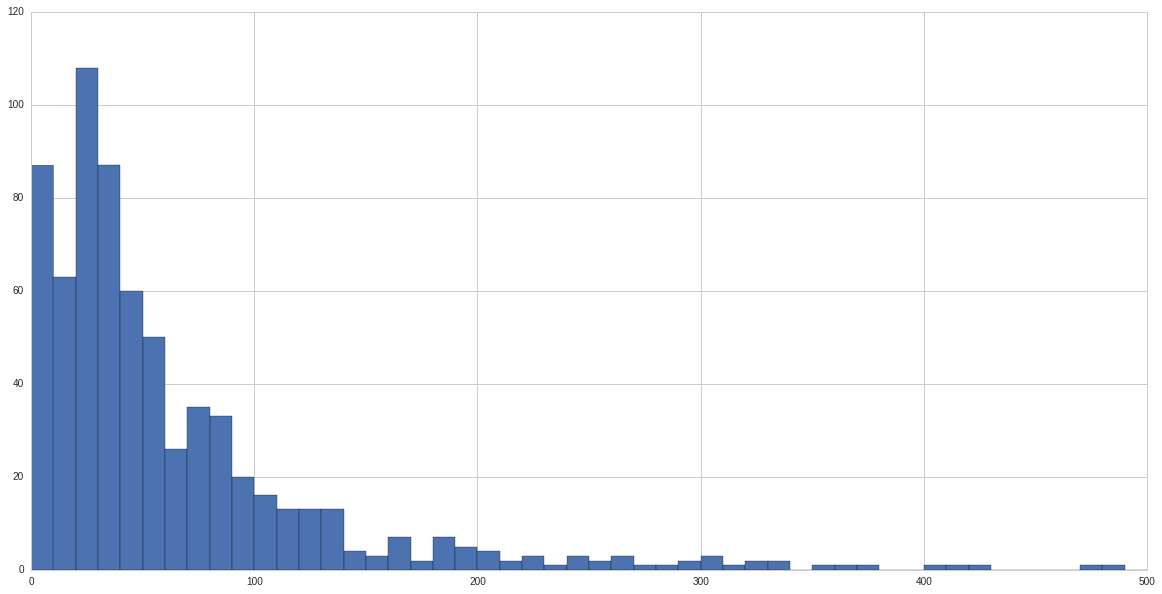

In [139]:
h = avg_time_dev
plt.hist(h.tolist(), bins=50, range=[0, 500])

In [140]:
np.percentile(avg_time_dev, q=[5, 50, 75, 90, 95, 97.5, 99])

array([   2.25      ,   40.40453686,   80.65816075,  144.65208316,
        233.20489438,  328.16237289,  488.59704894])

In [142]:
time_regression_df.columns[0:7]

Index(['pickup_datetime_day', 'pickup_datetime_dayofweek',
       'pickup_datetime_hour', 'pickup_latitude', 'pickup_longitude',
       'dropoff_latitude', 'dropoff_longitude'],
      dtype='object')

# <font color = 'blue'> Now we want to visualize the decision tree. To do so, plot the splits in geodata on the map of NYC (together with the heat map) </font color>

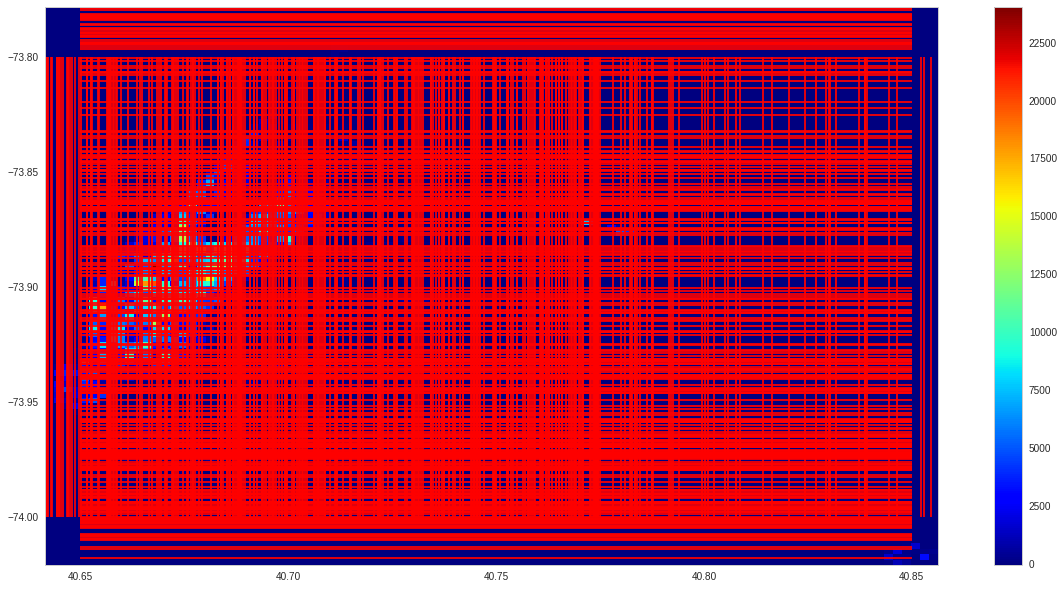

In [143]:
x = data_in_box.pickup_latitude
y = data_in_box.pickup_longitude

H, xedges, yedges = np.histogram2d(x, y, bins=100, normed=False, weights=None)

plt.jet()
fig = plt.figure(figsize=(20, 10))
#ax.set_title('pcolormesh: exact bin edges')
X, Y = np.meshgrid(xedges, yedges)
mesh = plt.pcolormesh(X, Y, H)
plt.colorbar(mesh)
#ax.set_aspect('equal')
#plt.savefig('figure.pdf', format='pdf')
#plt.savefig('figure.png', format='png')

## Plot the horizontal / vertival lines here via eventplot
plt.hold(True)
plt.eventplot(lat_splits, orientation='horizontal', lineoffsets=-73.9,
          linelengths=0.2, linewidths=None, color = [[1,0,0]],
          linestyles='solid')
plt.eventplot(long_splits, orientation='vertical', lineoffsets=40.75,
          linelengths=.2, linewidths=None, color = [[1,0,0]],
          linestyles='solid')
plt.axis([xedges.min(),xedges.max(),yedges.min(),yedges.max()]) # zoom in
plt.hold(False)